In [1]:
# Import the necessary libraries and packages 
import pyodbc
from dotenv import dotenv_values 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import calendar
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)
# Tables in the database 
db_query = '''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' '''

In [4]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

data = pd.read_sql(db_query, connection)
data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [5]:
# Connecting to the 2021 dataset
query = "select * from dbo.LP1_startup_funding2021"

startup_2021 = pd.read_sql(query, connection)
startup_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [6]:
# Connecting to the 2020 dataset
query = "select * from dbo.LP1_startup_funding2020"

startup_2020 = pd.read_sql(query, connection)
startup_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [7]:
# Load the 2019 dataset
startup_2019 = pd.read_csv('startup_funding2019.csv')
startup_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [8]:
# Load the 2018 dataset
startup_2018 = pd.read_csv('startup_funding2018.csv')
startup_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [9]:
# Closely examine the 2018 dataset for data quality considerations
#a quick overview of the datatypes for 2018 dataset
print(startup_2018.info(), "\n---------- Null Values ----------")

#check for null values
print(startup_2018.isna().sum(), "\n---------- Duplicate rows ----------")

#check for duplicates
print(startup_2018[startup_2018.duplicated()])

#check for duplicates count
print(startup_2018.duplicated().sum(), "\n---------- Duplicate Counts ----------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 
---------- Null Values ----------
Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64 
---------- Duplicate rows ----------
        Company Name                                           Industry  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
348         Seed  250000  Bangalore, Karnataka, India   

                                        

In [10]:
# a quick overview of the datatypes for 2019 dataset
print(startup_2019.info(), "\n---------- Null Values ----------")

#check for null values
print(startup_2019.isna().sum(), "\n---------- Duplicate rows ----------")

#check for duplicates
print(startup_2019[startup_2019.duplicated()])

#check for duplicates count
print(startup_2019.duplicated().sum(), "\n---------- Duplicate Counts ----------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 
---------- Null Values ----------
Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64 
---------- Duplicate rows ----------
Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founde

In [11]:
# a quick overview of the datatypes for 2020 dataset
print(startup_2020.info(), "\n---------- Null Values ----------")

#check for null values
print(startup_2020.isna().sum(), "\n---------- Duplicate rows ----------")

#check for duplicates
print(startup_2020[startup_2020.duplicated()])

#check for duplicates count
print(startup_2020.duplicated().sum(), "\n---------- Duplicate Counts ----------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB
None 
---------- Null Values ----------
Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64 
---------- Duplicate rows ----------
 

In [12]:
# a quick overview of the datatypes for 2021 dataset
print(startup_2021.info(), "\n---------- Null Values ----------")

#check for null values
print(startup_2021.isna().sum(), "\n---------- Duplicate Rows ----------")

#check for duplicates
print(startup_2021[startup_2021.duplicated()])

#check for duplicates count
print(startup_2021.duplicated().sum(), "\n---------- Duplicate Counts ----------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 
---------- Null Values ----------
Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64 
---------- Duplicate Rows ----------
          Company_Brand  Founded             HeadQuarter  \
107           Cur

In [13]:
# Preliminary Data Cleaning
# Add new columns for 'year_found', 'founders', and 'investors' - 2018
startup_2018['year_found'] = None
startup_2018['founders'] = None
startup_2018['investor'] = None

In [14]:
#rename column names for each dataframe for uniformity before merging
startup_2018.rename(columns = {'Company Name':'startup','Round/Series':'funding_stage','About Company': 'description','Industry':'industry','Amount':'amount_usd', 'Location':'location','investor':'investors'},inplace = True)
startup_2019.rename(columns = {'Company/Brand':'startup','HeadQuarter':'location','Sector':'industry','What it does' :'description','Amount($)':'amount_usd','Stage': 'funding_stage', 'Founders':'founders', 'Investor':'investors','Founded':'year_found'},inplace = True)
startup_2020.rename(columns = {'Company_Brand':'startup','HeadQuarter':'location','Sector':'industry','What_it_does' :'description','Amount':'amount_usd','Stage': 'funding_stage', 'Founders':'founders', 'Investor':'investors','Founded':'year_found'},inplace = True)
startup_2021.rename(columns = {'Company_Brand':'startup','HeadQuarter':'location','Sector':'industry','What_it_does' :'description','Amount':'amount_usd','Stage': 'funding_stage', 'Founders':'founders', 'Investor':'investors','Founded':'year_found'},inplace = True)

In [15]:
#add a column for the year funding was recieved for each dataframe before merging.
startup_2021['funding_year']= '2021'
startup_2020['funding_year']= '2020'
startup_2019['funding_year']= '2019'
startup_2018['funding_year']= '2018'

In [16]:
# merge all dataframes
allstartups = pd.concat([startup_2018,startup_2019,startup_2020,startup_2021], axis = 0)
allstartups.reset_index(drop=True, inplace=True)
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,None,None,2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,None,None,2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,None,None,2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,None,None,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,None,None,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,NaN
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NaN
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,NaN
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,NaN


In [17]:
#view the datatype
allstartups.info()
print(f'============Number of unique values===============')
allstartups.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startup        2879 non-null   object 
 1   industry       2861 non-null   object 
 2   funding_stage  1941 non-null   object 
 3   amount_usd     2622 non-null   object 
 4   location       2765 non-null   object 
 5   description    2879 non-null   object 
 6   year_found     2110 non-null   float64
 7   founders       2334 non-null   object 
 8   investors      2253 non-null   object 
 9   funding_year   2879 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 247.5+ KB
============Number of unique values===============


startup          2214
industry          873
funding_stage      75
amount_usd        803
location          172
description      2691
year_found         34
founders         1980
investors        1777
funding_year        4
column10            2
dtype: int64

In [18]:
#check for percentage of null values 
print(f'=================Percentage of null values============')
allstartups.isna().mean() * 100


=================Percentage of null values============


startup           0.000000
industry          0.625217
funding_stage    32.580757
amount_usd        8.926711
location          3.959708
description       0.000000
year_found       26.710663
founders         18.930184
investors        21.743661
funding_year      0.000000
column10         99.930531
dtype: float64

In [19]:
print(f'============Number of null values===============')
#check for the number of null values 
allstartups.isna().sum()

============Number of null values===============


startup             0
industry           18
funding_stage     938
amount_usd        257
location          114
description         0
year_found        769
founders          545
investors         626
funding_year        0
column10         2877
dtype: int64

In [20]:
allstartups = allstartups.drop(columns='column10')
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,None,None,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,None,None,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,None,None,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,None,None,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,None,None,2018
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021


In [21]:
# Drop duplicates for allstartups
allstartups = allstartups.drop_duplicates()
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,None,None,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,None,None,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,None,None,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,None,None,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,None,None,2018
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021


In [22]:
# examine the amount column and its unique values.
allstartups['amount_usd'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [23]:
# Full cleanup of the 'amount_usd' column
# initialize a list with all words in the amount column
mist = ['None','Upsparks','Series C', 'Seed','ah! Ventures','Pre-series A', 'ITO Angel Network, LetsVenture','JITO Angel Network, LetsVenture']
#get the index of the list 
mist_index = allstartups.index[allstartups['amount_usd'].isin(mist)]
#initialize a list of figures in funding_stage column
stage_values = ['$1200000','$300000','$6000000','$1000000']
#get the index of the list
stage_index = allstartups.index[allstartups['funding_stage'].isin(stage_values)]
#view entries in wrong columns which is the sum of the mist_index and stage_index
allstartups.loc[[1764, 1903, 1904, 2185, 2192, 2198, 2321,2324, 2795]]

#correct entries in the wrong columns by creating a list
corrections ={
        1764: {'amount_usd':'$1200000','investors':'Upsparks','location':'undisclosed','founders':'Pritesh Kumar, Bharat Gupta','funding_stage':'undisclosed'},
        1903: {'amount_usd':'$22000000','investors':'Morgan Stanley Private Equity Asia',
              'location':'None','Founders':'Varun Khanna','industry':'Pharmaceuticals',
              'funding_stage':'Series C','description':'Development and Manufacturing'},
        1904: {'amount_in_usd':'$5000000','investors':'Anshuman Maheshwary, Dr Srihari Raju Kalidindi','Founders':'Vikash Mishra, Mragank Jain',
              'industry':'None','funding_stage':'Seed',
              'description':"MoEVing is India's only Electric Mobility focu.."},
        2185: {'amount_usd':'$300000','Investor':'ah! Ventures','founders':'Vishal Gupta',
              'funding_stage':'None','description':'Holistic Development Programs for children in Soft Skills that make Smart Leaders'},
        2192: {'amount_usd':'$1000000','funding_stage':'Pre-series A','investors':'None'},
        2198: {'amount_usd':'$300000','investors':'JITO Angel Network, LetsVenture','founders':'Omkar Pandharkame, Ketaki Ogale',
             'funding_stage':'None'},
       2321: {'amount_usd':'$6000000','funding_stage':'None'},
       2324: {'amount_usd':'$1000000','investors':'JITO Angel Network, LetsVenture','funding_stage':'None'},
       2795:{'amount_usd':'1000000','funding_stage':'Seed','investors':'None'}
}

# Loop through each index and update the values
for index, new_values in corrections.items():
    for column, value in new_values.items():
        if column in allstartups.columns:
            allstartups.at[index, column] = value



# Preview rows with amount vales showing $Undisclosed, $undisclosed, and Undisclosed
undisclosed_list = ['$Undisclosed', '$undisclosed', 'Undisclosed']

# Get the index for all rows with undisclosed
undisclosed_index = allstartups.index[allstartups['amount_usd'].isin(undisclosed_list)]

# Replace undisclosed values with NA
allstartups.loc[undisclosed_index, ['amount_usd']] = allstartups.loc[undisclosed_index, ['amount_usd']].replace(undisclosed_list, np.nan)




def clean_amount(amount):
    """
    Cleans the 'Amount_in_usd' column by removing unwanted symbols and converting to float.
    If the amount is in rupees (₹), it converts to USD.
    """
    if isinstance(amount, str):
        # Remove unwanted symbols
        clean_amount = amount.replace('$', '').replace('₹', '').replace(',', '').replace('-', 'np.nan')
        # Convert to float
        try:
            clean_amount = float(clean_amount)
        except ValueError:
            return np.nan
        # Convert rupees to USD if applicable
        if '₹' in amount:
            clean_amount *= 0.0146
        return clean_amount
    elif isinstance(amount, (int, float)):
        return float(amount)
    else:
        return np.nan

allstartups['amount_usd'] = allstartups['amount_usd'].apply(clean_amount)

allstartups['amount_usd']

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              NaN
           ...    
2874     3000000.0
2875    20000000.0
2876    55000000.0
2877    26000000.0
2878     8000000.0
Name: amount_usd, Length: 2856, dtype: float64

In [24]:
# Impute missing values in the amount_usd column
allstartups['amount_usd'] = allstartups['amount_usd'].fillna(allstartups['amount_usd'].median())
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,None,None,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,None,None,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,None,None,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,None,None,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,None,None,2018
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021
2875,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021
2876,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021
2877,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021


In [25]:
# view unique values of funding stage
allstartups['funding_stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [26]:
import pandas as pd
import numpy as np
import re                      

# Define the mapping using a list of dictionaries
def map_stage(funding_stage):
    if pd.isna(funding_stage) or funding_stage in ['Undisclosed', 'undisclosed', 'None', 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']:
        return 'Not classified'
    
    if re.search(r'\b(Bootstrapping|Self-funding)\b', funding_stage, re.IGNORECASE):
        return 'Ideation'
    elif re.search(r'\b(Pre-Seed|Angel|Grant|Non-equity Assistance|Early Seed)\b', funding_stage, re.IGNORECASE): 
        return 'Validation'
    elif re.search(r'\b(Seed|Seed Funding|Seed Fund|Seed Round|Seed Investment|Pre Series A|Pre-Seed Round|Pre Series A1)\b', funding_stage , re.IGNORECASE):
        return 'Early Traction'
    elif re.search(r'\b(Series [A-I]|Private Equity|Venture - Series Unknown|Corporate Round|Secondary Market|Fresh Funding|Post Series A|Series B\+|Pre-Series A1|Series A\+|Series B3|PE|Series F1|Series A2|Mid Series|Series C, D|Series E2|Series D1|Series F2|Series B2|Series A-1|Pre-Series B|Pre-Series C)\b', funding_stage, re.IGNORECASE):
        return 'Scaling'
    elif re.search(r'\b(Debt Financing|Post-IPO Debt|Post-IPO Equity|Bridge|Bridge Round|Debt|Funding Round|Edge)\b', funding_stage, re.IGNORECASE):
        return 'Exit Options'
    else:
        return 'Not classified'
    
# Apply the function to the 'funding_stage' column
allstartups['funding_stage'] = allstartups['funding_stage'].apply(lambda x: map_stage(x)).astype(str)

# Print the DataFrame to check the results
allstartups['funding_stage'].unique()

array(['Early Traction', 'Scaling', 'Validation', 'Exit Options',
       'Not classified'], dtype=object)

In [27]:
#check the unique values in location and inconsistencies
allstartups['industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [28]:
allstartups['industry'] = allstartups['industry'].str.capitalize()
allstartups['industry'].value_counts()

industry
Fintech                                                      257
Edtech                                                       215
E-commerce                                                    75
Financial services                                            74
Healthcare                                                    67
                                                            ... 
Rental, taxi service, travel                                   1
E-commerce, e-commerce platforms, internet, retail             1
Financial services, professional services                      1
Customer service, messaging, mobile apps, personalization      1
Staffing & recruiting                                          1
Name: count, Length: 837, dtype: int64

In [29]:
# Get the first sentence of every list
allstartups['industry']=allstartups['industry'].str.split(",").str[0].astype('str')
allstartups['industry'].unique()
# merged_df['industry'].value_counts()

array(['Brand marketing', 'Agriculture', 'Credit', 'Financial services',
       'E-commerce platforms', 'Cloud infrastructure', 'Internet',
       'Market research', 'Information services', 'Mobile payments',
       'B2b', 'Apps', 'Food delivery', 'Industrial automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial intelligence',
       'Internet of things', 'Air transportation', 'Food and beverage',
       'Autonomous vehicles', 'Enterprise software', 'Logistics',
       'Insurance', 'Information technology', 'Blockchain', 'Education',
       'E-commerce', 'Renewable energy', 'E-learning', 'Clean energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and entertainment', 'Broadcasting', 'Edtech', 'Health care',
       '—', 'Sports', 'Big data', 'Cloud computing', 'Food processing',
       'Trading platform', 'Consumer goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer applications', 'Mobile',

In [30]:
import re

# Mapping the industries to sectors using regular expre
def map_sector(industry):
    if re.search(r'\b(3D Printing|Analytics|.*Tech.*|Android|Apps|Artificial Intelligence|Battery|Big Data|Blockchain|CleanTech|Cloud Computing|Cloud Infrastructure|Collaboration|Communities|Computer|Consumer Applications|Embedded Systems|Energy|Enterprise Resource Planning \(ERP\)|Enterprise Software|File Sharing|Information Services|Information Technology|Internet|Internet of Things|Mobile|Nanotechnology|Renewable Energy|Search Engine|Smart Cities|Software)\b', industry, re.IGNORECASE):
        return 'IT & Technology'
    elif re.search(r'\b(Accounting|B2B|Business Development|Business Intelligence|Business Travel|Career Planning|Consulting|Creative Agency|Crowdsourcing|Customer Service|Environmental Consulting|Facilities Support Services|Government|Human Resources|Market Research)\b', industry, re.IGNORECASE):
        return 'Business Services'
    elif re.search(r'\b(Advertising|Audio|Brand Marketing|Broadcasting|Classifieds|Digital Entertainment|Digital Marketing|Digital Media|Gaming|Marketing|Media and Entertainment|Music|Music Streaming|News|Online Games|Online Portals|Reading Apps|Social Media)\b', industry, re.IGNORECASE):
        return 'Media & Entertainment'   
    elif re.search(r'\b(Aerospace|Automotive|Autonomous Vehicles|Industrial|Industrial Automation|Packaging Services)\b', industry, re.IGNORECASE):
        return 'Manufacturing'
    elif re.search(r'\b(AgTech|Agriculture|Farming)\b', industry, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'\b(Air Transportation|Delivery|Delivery Service|Electric Vehicle|Last Mile Transportation|Logistics|Transportation|Transportation)\b', industry, re.IGNORECASE):
        return 'Transportation & Logistics'
    elif re.search(r'\b(Hel.*|Hea.*|Hosp.*|Vet.*|Pharma.*|Alternative Medicine|Biopharma|Biotechnology|Dental|Dietary Supplements|Child Care|Health Care|Health Diagnostics|Hospital|Medical|Medical Device|Veterinary|Wellness|Healthcare)\b', industry, re.IGNORECASE):
        return 'Healthcare & Life Sciences'
    elif re.search(r'\b(Fin.*|Banking|Consumer Lending|Credit|Credit Cards|Crowdfunding|Cryptocurrency|FinTech|Finance|Financial Services|Fraud Detection|Funding Platform|Health Insurance|Insurance|Mobile Payments|Trading Platform|Wealth Management)\b', industry, re.IGNORECASE):
        return 'Financial Services'
    elif re.search(r'\b(Basketball|Fantasy Sports|Fitness|Sports|eSports)\b', industry, re.IGNORECASE):
        return 'Sports'
    elif re.search(r'\b(Beauty|Children|Consumer|Consumer Electronics|Cooking|Cosmetics|Eyewear|Fashion|Food Processing|Food and Beverage|Home Decor)\b', industry, re.IGNORECASE):
        return  'Consumer Goods'
    elif re.search(r'\b(Catering|.*travel.*|Events|Hospitality|Tourism|Travel|Wedding)\b', industry, re.IGNORECASE):
        return 'Travel & Tourism' 
    elif re.search(r'\b(E-Commerce|E-Commerce Platforms|Marketplace|Retail|.*commerce.*|)\b', industry, re.IGNORECASE):
        return 'Online Retail' 
    elif re.search(r'\b(Continuing Education|.*Edu.*|learn|academy|Professional Training & Coaching|tutor|stem|Higher Educatio|E-Learning|EdTech|edttech|Preschool Daycare|school|Education|edutech|Teaching|Training)\b', industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'\b(Commercial|Commercial Real Estate|Rental||Housing Marketplace|Furniture Rental|Real estate|Housing|Rental|Furniture|Rental space|Proptech)\b', industry, re.IGNORECASE):
        return 'Real Estate'
    elif re.search(r'\b(Clean Energy|.*nergy.*|EV|Solar.*|Ev startup|Electricity|Wl & rac protection)\b', industry, re.IGNORECASE):
        return 'Energy'
    else:
        return 'Others'
    
# # Apply the function to the Industry column
allstartups['industry'] = allstartups['industry'].apply(map_sector)

# # Display the DataFrame to verify the changes
allstartups['industry'].value_counts()

industry
IT & Technology               1069
Online Retail                  879
Healthcare & Life Sciences     196
Financial Services             164
Consumer Goods                 127
Media & Entertainment           98
Transportation & Logistics      83
Manufacturing                   76
Business Services               70
Sports                          34
Others                          30
Agriculture                     15
Travel & Tourism                15
Name: count, dtype: int64

In [31]:
# filter only the rows with the "Others" industry
others_ind = allstartups[allstartups["industry"] == "Others" ]
others_ind.head(5)

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
58,MissMalini Entertainment,Others,Early Traction,1518400.0,"Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,NaN,None,None,2018
105,Jagaran Microfin,Others,Exit Options,8030000.0,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,NaN,None,None,2018
121,FLEECA,Others,Early Traction,3000000.0,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,NaN,None,None,2018
146,WheelsEMI,Others,Scaling,14000000.0,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",NaN,None,None,2018
153,Fric Bergen,Others,Scaling,3000000.0,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,NaN,None,None,2018


In [32]:
# view the descriptions of the companies with the others categories
others_ind["description"]

58     MissMalini Entertainment is a multi-platform n...
105    Jagaran Microfin is a Microfinance institution...
121              FLEECA is a Tyre Care Provider company.
146    WheelsEMI is the brand name of NBFC, WheelsEMI...
153    Fric Bergen is a leader in the specialty food ...
174    Deftouch is a mobile game development company ...
181    Corefactors is a leading campaign management, ...
210    Cell Propulsion is an electric mobility startu...
230                      FInd your Customized Home here.
235    dishq leverages food science and machine learn...
238    Trell is a location based network which helps ...
242          New Apartments, Flats for Sale in Bangalore
243    It is a fabless semiconductor company focused ...
247    SaffronStays connects travellers to India's In...
251    Inner Being Wellness manufactures beauty, well...
257    SEO, PPC, Search Engine Marketing, Social Medi...
258                             Digital Marketing Agency
259    Scale Labs is a cross bo

In [33]:
# create dictionary to contain the keywords in the what_it_does column
keywords = {
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Travel & Tourism',
    'beauty, wellness': 'Consumer Goods',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Travel & Tourism',
    'edutech': 'Education'
}

# Function to assign sector based on description
def assign_sector(description):
    for keyword,industry in keywords.items():
        if keyword in description.lower():
            return industry
    return "Others" #Keep Others if no keyword matches

# Update sectors for entries currently labeled as "Others"
allstartups.loc[allstartups['industry'] == 'Others', 'industry'] = allstartups.loc[allstartups['industry'] == 'Others', 'description'].apply(assign_sector)
allstartups['industry'].value_counts()

industry
IT & Technology               1074
Online Retail                  879
Healthcare & Life Sciences     196
Financial Services             169
Consumer Goods                 132
Media & Entertainment           99
Transportation & Logistics      84
Manufacturing                   76
Business Services               74
Sports                          34
Travel & Tourism                16
Agriculture                     15
Others                           7
Education                        1
Name: count, dtype: int64

In [34]:
# Replace all the Nulls with undisclosed
allstartups["investors"].fillna("Not recorded",inplace=True)

In [35]:
#  Remove unwanted characters
allstartups['year_found'] = allstartups['year_found'].replace(['...', np.nan], np.NaN)
allstartups['year_found'].isna().sum()

768

In [36]:
# Remove unwanted characters
allstartups['founders'] = allstartups['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
allstartups['founders'].isna().sum()


#fill the nulls with unknown
allstartups['founders'].fillna('Not recorded', inplace = True)
allstartups['founders'].isna().sum()

0

In [37]:
# Impute missing values in the amount_usd column
allstartups['year_found'] = allstartups['year_found'].fillna(allstartups['year_found'].median())
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021


In [38]:
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021


In [39]:
# check unique values in the location column
allstartups.location.unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [40]:
# wrong entries from other columns found in location and has to be corrected.
# initialize a list with all wrong entries  in the locattion column
wrong_loc = ['Food & Beverages','Online Media\t#REF!', 'Information Technology & Services']
# get the index of the list 
wrong_loc_index = allstartups.index[allstartups['location'].isin(wrong_loc)]
# view entries in wrong columns and correct them
allstartups.loc[[1902, 2747, 2823]]
# correct entries in the wrong columns by creating a list
correct_entries ={
                1902: {'industry':'Food & Beverages','location':'Hauz Khas'},
                2747: {'industry':'Online Media','location':'None',
                        'founders':'CA Harvinderjit Singh Bhatia, Garima Surana, A',
                      'description':'Sochcast is an Audio experiences company that ...',
                       'investors':'Vinners, Raj Nayak, Amritaanshu Agrawal'},
                2823: {'industry':'Information Technology & Services','location':'Manchester, Greater Manchester'}
                }
# Loop through each index and update the values
for index, new_values in correct_entries.items():
    for column, value in new_values.items():
        if column in allstartups.columns:
            allstartups.at[index, column] = value


# # Split the location Column into City, State and Country
allstartups[["city", "state","country"]] = allstartups["location"].str.split(",", n=2, expand=True)
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bangalore,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurgaon,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,None,None
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,New Delhi,None,None
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bangalore,None,None
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,None,None


In [41]:
#remove \t#REF! from city column
allstartups['city'] = allstartups['city'].str.replace('\t#REF!','')

In [42]:
allstartups["city"].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', None, 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [43]:
# Create a dictionary to be used to correct the misspelling of the names of items within the city column
correct_city_mapping = {'Bengaluru':'Bengaluru','Mumbai':'Mumbai','Gurgaon':'Gurugram','Noida':'Noida','Hyderabad':'Hyderabad',
                        'Bangalore':'Bengaluru','Kalkaji':'NCT Delhi','Delhi':'NCT Delhi','Hubli':'Hubballi','New Delhi':'NCT Delhi',
                        'Chennai':'Chennai','Mohali':'Sahibzada Ajit Singh Nagar','Kolkata':'Kolkata','Pune':'Pune','Jodhpur':'Jodhpur',
                        'Kanpur':'Kanpur','Ahmedabad':'Ahmedabad','Azadpur':'NCT Delhi','Haryana':'Haryana','Cochin':'Kochi','Faridabad':'Faridabad',
                        'Jaipur':'Jaipur','Kota':'Kota','Anand':'Anand','Bangalore City':'Bengaluru','Belgaum':'Belagavi','Thane':'Thane',
                        'Margão':'Madgaon','Indore':'Indore','Alwar':'Alwar','Kannur':'Kannur','Trivandrum':'Thiruvananthapuram',
                        'Ernakulam':'Kochi','Kormangala':'Bengaluru','Uttar Pradesh':'Uttar Pradesh','Andheri':'Mumbai','Mylapore':'Chennai',
                        'Ghaziabad':'Ghaziabad','Kochi':'Kochi','Powai':'Mumbai','Guntur':'Guntur','Kalpakkam':'Kalpakkam','Bhopal':'Bhopal',
                        'Coimbatore':'Coimbatore','Worli':'Mumbai','Alleppey':'Alappuzha','Chandigarh':'Chandigarh','Guindy':'Chennai',
                        'Lucknow':'Lucknow','nan':'Not Recorded','Telangana':'Telangana','Gurugram':'Gurugram','Surat':'Surat','Uttar pradesh':'Uttar Pradesh',
                        'Rajasthan':'Rajasthan','Tirunelveli':'Tirunelveli','None':'Not Recorded','Singapore':'Singapore','Gujarat':'Gujarat',
                        'Kerala':'Kerala','Frisco':'Frisco','California':'California','Dhingsara':'Dhingsara','New York':'New York','Patna':'Patna',
                        'San Francisco':'San Francisco','San Ramon':'San Ramon','Paris':'Paris','Plano':'Plano','Sydney':'Sydney','San Francisco Bay Area':'San Francisco',
                        'Bangaldesh':'Bangladesh','London':'London','Milano':'Milano','Palmwoods':'Palmwoods','France':'France','Samastipur':'Samastipur','Irvine':'Irvine',
                        'Tumkur':'Tumkur','Newcastle Upon Tyne':'Newcastle upon Tyne','Shanghai':'Shanghai','Jiaxing':'Jiaxing','Rajasthan':'Rajasthan','Ludhiana':'Ludhiana',
                        'Dehradun':'Dehradun','San Franciscao':'San Francisco','Tangerang':'Tangerang','Berlin':'Berlin','Seattle':'Seattle','Riyadh':'Riyadh','Seoul':'Seoul',
                        'Bangkok':'Bangkok','Warangal':'Warangal','Hyderebad':'Hyderabad','Odisha':'Odisha','Bihar':'Bihar','Goa':'Goa','Tamil Nadu':'Tamil Nadu',
                        'Banglore':'Bangalore','Ahmadabad':'Ahmedabad','Small Towns':'Small Towns','Rajsamand':'Rajsamand','Ranchi':'Ranchi','undisclosed':'Not Recorded',
                        'Vadodara':'Vadodara','Hauz Khas':'NCT Delhi','Nagpur':'Nagpur','West Bengal':'West Bengal','Samsitpur':'Samastipur','Silvassa':'Silvassa',
                        'Thiruvananthapuram':'Thiruvananthapuram','Roorkee':'Roorkee','Ambernath':'Ambarnath','Panchkula':'Panchkula','Mangalore':'Mangaluru',
                        'Telugana':'Telangana','Bhubaneswar':'Bhubaneswar','Kottayam':'Kottayam','Beijing':'Beijing','Panaji':'Panaji','Satara':'Satara','Orissia':'Odisha',
                        'Santra':'Nagpur','Mountain View':'Mountain View','Jharkhand':'Jharkhand','Bhilwara':'Bhilwara','Guwahati':'Guwahati','Manchester':'Manchester',
                        'The Nilgiris':'The Nilgiris','Gandhinagar':'Gandhinagar','Banglore':'Bengaluru'

}

allstartups['city'] = allstartups['city'].map(correct_city_mapping)
allstartups
 

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bengaluru,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurugram,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,None,None
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NCT Delhi,None,None
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bengaluru,None,None
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,None,None


In [44]:
#view the city column unique values
allstartups.city.unique()



array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad',
       'NCT Delhi', nan, 'Hubballi', 'Chennai',
       'Sahibzada Ajit Singh Nagar', 'Kolkata', 'Pune', 'Jodhpur',
       'Kanpur', 'Ahmedabad', 'Haryana', 'Kochi', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Belagavi', 'Thane', 'Madgaon', 'Indore', 'Alwar',
       'Kannur', 'Thiruvananthapuram', 'Uttar Pradesh', 'Ghaziabad',
       'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore', 'Alappuzha',
       'Chandigarh', 'Lucknow', 'Telangana', 'Surat', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'Bangladesh', 'London',
       'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle upon Tyne', 'Shanghai', 'Jiaxing', 'Ludhiana',
       'Dehradun', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul',
       'Bangkok', 'Warangal', 'Odisha', 'Bihar', 

In [45]:
city_state_mapping = {'Bengaluru':'Karnataka','Hubballi': 'Karnataka','Belagavi':'Karnataka','Tumkur':'Karnataka','Managaluru':'Karnataka',
                      'Mumbai':'Maharashtra','Pune':'Maharashtra','Thane':'Maharashtra','Nagpur':'Maharashtra','Ambarnath':'Maharashtra',
                      'Satara':'Maharashtra', 'Gurugram':'Haryana','Faridabad':'Haryana','Haryana':'Haryana','Chandigarh':'Haryana',
                      'Dhingsara':'Haryana','Panchkula':'Haryana','Noida':'Uttar Pradesh','Kanpur':'Uttar Pradesh','Ghaziabad':'Uttar Pradesh',
                      'Lucknow':'Uttar Pradesh','Hyderabad':'Telangana','Telangana':'Telangana','Warangal':'Telangana','NCT Delhi':'National Capital Territory',
                      'nan':'Not Recorded','Small Towns':'Andhra Pradesh','Not Recorded':'Not Recorded','Chennai':'Tamil Nadu','Kalpakkam': 'Tamil Nadu',
                      'Coimbatore':'Tamil Nadu','Tirunelveli':'Tamil Nadu','Tamil Nadu':'Tamil Nadu','The Nilgiris':'Tamil Nadu',
                      'Sahibzada Ajit Singh Nagar':'Punjab','Ludhiana':'Punjab','Kolkata':'West Bengal','West Bengal':'West Bengal','Rajasthan':'Rajasthan',
                      'Jodhpur':'Rajasthan','Jaipur':'Rajasthan','Kota':'Rajasthan','Alwar':'Rajasthan','Rajsmand':'Rajasthan','Bhilwara':'Rajashtan', 'Rajashtan':'Rajasthan',
                      'Ahmedabad':'Gujarat','Anand':'Gujarat','Surat':'Gujarat','Gandhinagar':'Gujarat','Vadodara':'Gujarat','Kochi':'Kerala','Kannur':'Kerala','Thiruvananthapuram':'Kerala',
                      'Alappuzha':'Kerala','Kottayam':'Kerala','Madgaon':'Goa','Goa':'Goa','Panaji':'Goa','Indore':'Madhya Pradesh','Bhopal':'Madhya Pradesh',
                      'Guntur':'Andhra Pradesh', 'Patna':'Bihar','Samastipur':'Bihar','Bihar':'Bihar','Dehradun':'Uttarakhand','Roorkee':'Uttarakhand','Odisha':'Odisha',
                      'Bhubaneswar':'Odisha','Ranchi':'Jharkhand','Jharkhand':'Jharkhand','Silvassa':'DNDD','Guwahati':'Assam','Singapore':'Singapore','Frisco':'Texas',
                      'Plano':'Texas','California':'California','San Francisco':'California','San Ramon':'California','Irvine':'California','Mountain View':'California',
                      'New York':'New York','Paris':'Ile-de-France','Syndey':'New South Wales','Bangladesh':'Bangladesh','London':'England','Newcastle upon Tyne':'England',
                      'Milano':'Lombardy','Palmwods':'Queensland','France':'France','Shanghai':'East China','Jiaxing':'Zheijang','Tangerang':'Banten','Berlin':'Berlin',
                      'Seattle':'Washington','Riyadh':'Riyadh','Seoul':'Seoul Capital Area','Bangkok':'Central Thailand','Beijing':'Beijing','Manchester':'England'

}

 # Map the cities to their respective states
allstartups['state'] = allstartups['city'].map(city_state_mapping)

# # # Replace 'nan' and 'None' values in the City column with np.nan
# merged_df['city'].replace(['nan', 'None', 'unknown'], np.nan, inplace=True)

# Replace np.nan in the State column with the mapped state from the City column
allstartups['state'].fillna(allstartups['city'].map(city_state_mapping),inplace = True)

# Replace 'nan' values in the State column with unknown
allstartups['state'].str.replace('nan','Not Recorded').replace(' ','Not Recorded')

# Display the DataFrame

allstartups['state'].unique()
allstartups['state'].value_counts()

state
Karnataka                     925
Maharashtra                   597
Haryana                       361
National Capital Territory    321
Tamil Nadu                    117
Uttar Pradesh                  97
Telangana                      80
Gujarat                        41
Rajasthan                      39
West Bengal                    23
Kerala                         20
California                     18
Madhya Pradesh                 17
Goa                             6
England                         5
Bihar                           5
New York                        4
Singapore                       4
Punjab                          3
Not Recorded                    3
Odisha                          3
Texas                           2
Andhra Pradesh                  2
Jharkhand                       2
Uttarakhand                     2
Riyadh                          1
Rajashtan                       1
Beijing                         1
DNDD                            1
Central 

In [46]:
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bengaluru,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurugram,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Telangana,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,Haryana,None
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NCT Delhi,National Capital Territory,None
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bengaluru,Karnataka,None
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,Haryana,None


In [47]:
#cleaning the country column
allstartups['country'].unique()

array([' India', None, ' Asia', nan, ' United States', ' France',
       ' West Coast', ' United Kingdom', ' Australia', ' Italy',
       ' Western US', ' China', ' Indonesia'], dtype=object)

In [48]:
#remove whitespaces
allstartups['country'] = allstartups['country'].str.strip()
# Dictionary to map states to their respective countries
state_to_country = {
    'Karnataka': 'India', 'Maharashtra': 'India', 'Haryana': 'India', 'Uttar Pradesh': 'India',
    'Telangana': 'India', 'National Capital Territory': 'India', 'Tamil Nadu': 'India', 'Punjab': 'India',
    'West Bengal': 'India', 'Rajasthan': 'India', 'Gujarat': 'India', 'Kerala': 'India',
    'Goa': 'India', 'Madhya Pradesh': 'India', 'Andhra Pradesh': 'India', 'Bihar': 'India',
    'Jharkhand': 'India', 'DNDD': 'India', 'Uttarakhand': 'India',
    'Odisha': 'India', 'Assam': 'India', 'West Coast': 'United States','Western US':'United States', 
    'California':'United States','New York':'United States','Texas':'United States',
    'New South Wales':'Australia','Queensland':'Australia','Ile-de-France':'France','Lombardia':'Italy','Not Recorded': 'Not Recorded',
    'Central Thailand':'Thailand', 'Washington': 'United States', 'Beijing Municipality':'China', 'Riyadh':'Saudi Arabia',
    'Berlin':'Germany', 'Seoul Capital Area':'South Korea','England':'United Kingdom','nan':'Not Recorded','Bangladesh':'Bangladesh','Singapore':'Singapore'
}

# Map the states to their respective countries
allstartups['country'] = allstartups['country'].fillna(allstartups['state'].map(state_to_country))
# # Map the states to their respective countries
# startups_df['country'] = startups_df['country'].fillna(startups_df['state'].map(state_to_country))


# Display the DataFrame
allstartups['country'].unique()

array(['India', nan, 'Asia', 'Singapore', 'United States', 'France',
       'West Coast', 'Bangladesh', 'United Kingdom', 'Australia', 'Italy',
       'Western US', 'China', 'Indonesia', 'Germany', 'Saudi Arabia',
       'South Korea', 'Thailand', 'Not Recorded'], dtype=object)

In [49]:
#allstartups.to_csv('allstartups_copy.csv', index=False)

In [50]:
allstartups.isna().sum()

startup            0
industry           0
funding_stage      0
amount_usd         0
location         114
description        0
year_found         0
founders           0
investors          0
funding_year       0
city             124
state            143
country          144
dtype: int64

In [51]:
# Fill NaN values in a specific column (e.g., 'city') with a default value
allstartups['city'].fillna('Not Recorded', inplace=True)
allstartups

,startup,industry,funding_stage,amount_usd,location,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bengaluru,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurugram,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Telangana,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,Haryana,India
2875,Vahdam,Online Retail,Scaling,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NCT Delhi,National Capital Territory,India
2876,Leap Finance,Financial Services,Scaling,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bengaluru,Karnataka,India
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,Haryana,India


In [52]:
# Use pandas loc to conditionally update the 'state' column based on the 'city' column
allstartups.loc[allstartups['city'] == 'Sydney', 'state'] = 'New South Wales'
allstartups.loc[allstartups['city'] == 'Palmwoods', 'state'] = 'Queensland'
allstartups.loc[allstartups['city'] == 'Uttar Pradesh','state'] = 'Uttar Pradesh'
allstartups.loc[allstartups['city'] == 'Gujarat','state'] = 'Gujarat'
allstartups.loc[allstartups['city'] == 'Kerala','state'] = 'Kerala'
allstartups.loc[allstartups['city'] == 'Vadadora','state'] = 'Gujarat'
allstartups.loc[allstartups['city'] == 'Mangaluru','state'] = 'Karnataka'
allstartups.loc[allstartups['city'] == 'Rajsamand','state'] = 'Rajasthan'
allstartups.loc[allstartups['city'] == 'Not Recorded','state'] = 'Not Recorded'

# Display the DataFrame
print(allstartups)


              startup               industry   funding_stage  amount_usd  \
0     TheCollegeFever  Media & Entertainment  Early Traction    250000.0   
1     Happy Cow Dairy            Agriculture  Early Traction    584000.0   
2          MyLoanCare     Financial Services         Scaling    949000.0   
3         PayMe India     Financial Services      Validation   2000000.0   
4            Eunimart          Online Retail  Early Traction   3000000.0   
...               ...                    ...             ...         ...   
2874         Gigforce          Online Retail         Scaling   3000000.0   
2875           Vahdam          Online Retail         Scaling  20000000.0   
2876     Leap Finance     Financial Services         Scaling  55000000.0   
2877     CollegeDekho        IT & Technology         Scaling  26000000.0   
2878           WeRize     Financial Services         Scaling   8000000.0   

                              location  \
0          Bangalore, Karnataka, India   
1  

In [53]:
# Update the country column
allstartups.loc[allstartups['country'] == 'Western US', 'country'] = 'United States'
allstartups.loc[allstartups['country'] == 'West Coast','country'] = 'United States'

In [54]:
# Use pandas loc to conditionally update the 'country' column based on the 'state' column
allstartups.loc[allstartups['state'] == 'Beijing', 'country'] = 'China'
allstartups.loc[allstartups['state'] == 'England', 'country'] = 'United Kingdom'
allstartups.loc[allstartups['state'] == 'Singapore','country'] = 'Singapore'
allstartups.loc[allstartups['state'] == 'France','country'] = 'France'
allstartups.loc[allstartups['state'] == 'New South Wales','country'] = 'Australia'
allstartups.loc[allstartups['state'] == 'East China','country'] = 'China'
allstartups.loc[allstartups['state'] == 'Seoul Capital Area','country'] = 'South Korea'
allstartups.loc[allstartups['state'] == 'Gujarat','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Kerala','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Karnataka','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Rajasthan','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Uttar Pradesh','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Rajashtan','country'] = 'India'
allstartups.loc[allstartups['state'] == 'Not Recorded','country'] = 'India'
# Display the DataFrame
print(allstartups)

              startup               industry   funding_stage  amount_usd  \
0     TheCollegeFever  Media & Entertainment  Early Traction    250000.0   
1     Happy Cow Dairy            Agriculture  Early Traction    584000.0   
2          MyLoanCare     Financial Services         Scaling    949000.0   
3         PayMe India     Financial Services      Validation   2000000.0   
4            Eunimart          Online Retail  Early Traction   3000000.0   
...               ...                    ...             ...         ...   
2874         Gigforce          Online Retail         Scaling   3000000.0   
2875           Vahdam          Online Retail         Scaling  20000000.0   
2876     Leap Finance     Financial Services         Scaling  55000000.0   
2877     CollegeDekho        IT & Technology         Scaling  26000000.0   
2878           WeRize     Financial Services         Scaling   8000000.0   

                              location  \
0          Bangalore, Karnataka, India   
1  

In [55]:
allstartups.isna().sum()

startup            0
industry           0
funding_stage      0
amount_usd         0
location         114
description        0
year_found         0
founders           0
investors          0
funding_year       0
city               0
state              0
country            0
dtype: int64

In [56]:
allstartups.to_csv('allstartups_copy.csv', index=False)

In [57]:
allstartups = allstartups.drop(columns=['location'])
allstartups

,startup,industry,funding_stage,amount_usd,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bengaluru,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurugram,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Telangana,India
...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Online Retail,Scaling,3000000.0,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,Haryana,India
2875,Vahdam,Online Retail,Scaling,20000000.0,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NCT Delhi,National Capital Territory,India
2876,Leap Finance,Financial Services,Scaling,55000000.0,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bengaluru,Karnataka,India
2877,CollegeDekho,IT & Technology,Scaling,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,Haryana,India


In [58]:
# Reset the index of the DataFrame and drop the old index
allstartups = allstartups.reset_index(drop=True)
allstartups


,startup,industry,funding_stage,amount_usd,description,year_found,founders,investors,funding_year,city,state,country
0,TheCollegeFever,Media & Entertainment,Early Traction,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2017.0,Not recorded,Not recorded,2018,Bengaluru,Karnataka,India
1,Happy Cow Dairy,Agriculture,Early Traction,584000.0,A startup which aggregates milk from dairy far...,2017.0,Not recorded,Not recorded,2018,Mumbai,Maharashtra,India
2,MyLoanCare,Financial Services,Scaling,949000.0,Leading Online Loans Marketplace in India,2017.0,Not recorded,Not recorded,2018,Gurugram,Haryana,India
3,PayMe India,Financial Services,Validation,2000000.0,PayMe India is an innovative FinTech organizat...,2017.0,Not recorded,Not recorded,2018,Noida,Uttar Pradesh,India
4,Eunimart,Online Retail,Early Traction,3000000.0,Eunimart is a one stop solution for merchants ...,2017.0,Not recorded,Not recorded,2018,Hyderabad,Telangana,India
...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Online Retail,Scaling,3000000.0,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Gurugram,Haryana,India
2852,Vahdam,Online Retail,Scaling,20000000.0,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NCT Delhi,National Capital Territory,India
2853,Leap Finance,Financial Services,Scaling,55000000.0,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Bengaluru,Karnataka,India
2854,CollegeDekho,IT & Technology,Scaling,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Gurugram,Haryana,India


In [59]:
allstartups.to_csv('allstartups_copy.csv', index=False)

In [60]:
allstartups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startup        2856 non-null   object 
 1   industry       2856 non-null   object 
 2   funding_stage  2856 non-null   object 
 3   amount_usd     2856 non-null   float64
 4   description    2856 non-null   object 
 5   year_found     2856 non-null   float64
 6   founders       2856 non-null   object 
 7   investors      2856 non-null   object 
 8   funding_year   2856 non-null   object 
 9   city           2856 non-null   object 
 10  state          2856 non-null   object 
 11  country        2856 non-null   object 
dtypes: float64(2), object(10)
memory usage: 267.9+ KB


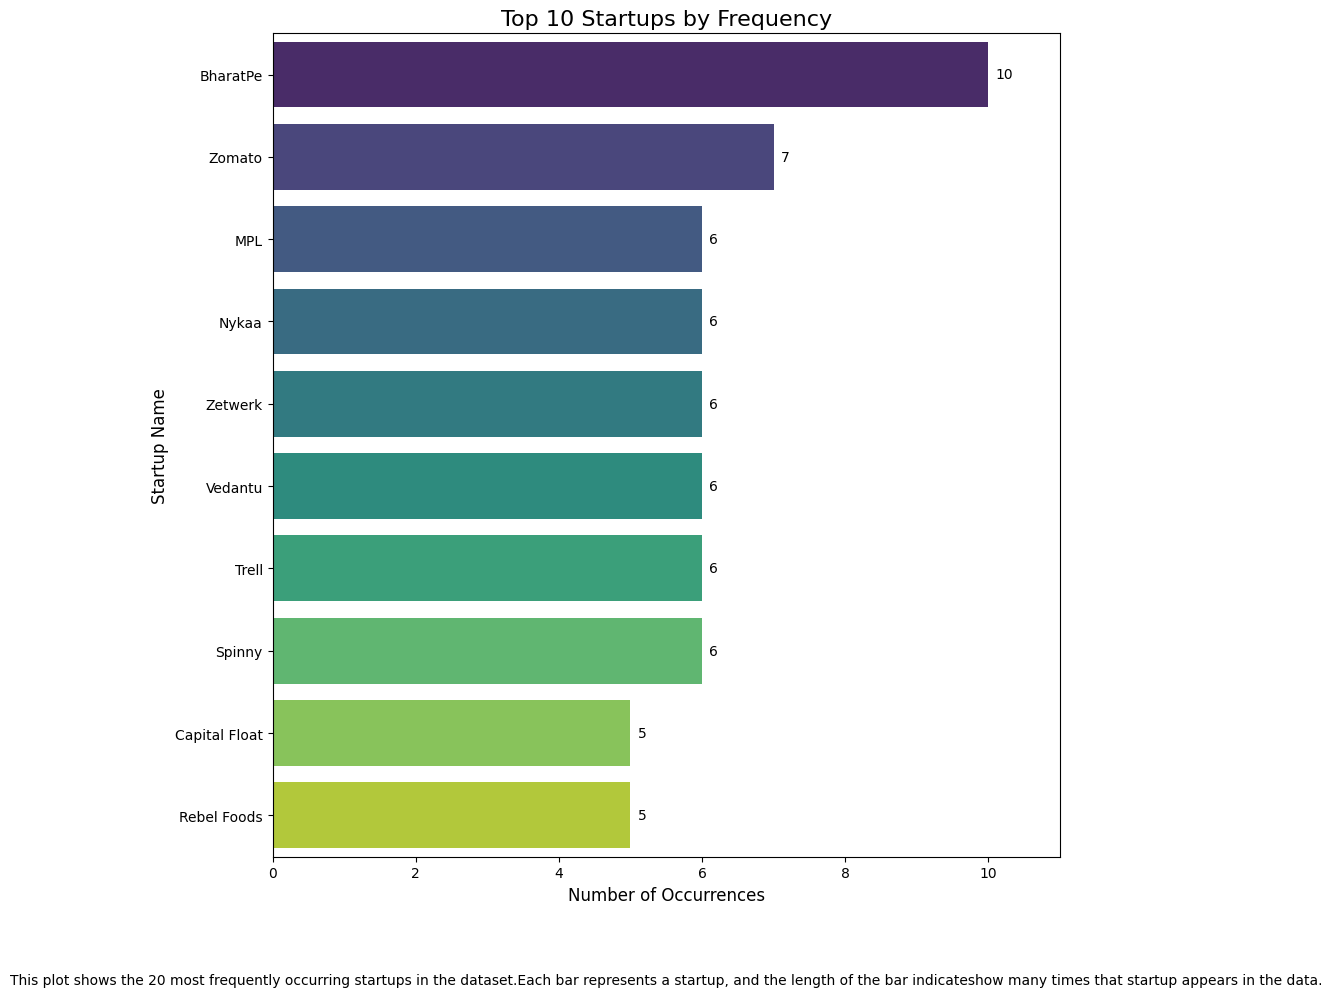

Visualization.


In [61]:
# UNIVARIATE ANALYSIS
# Startup
import matplotlib.pyplot as plt
import seaborn as sns

# Conduct univariate analysis for the 'startup' column
startup_counts = allstartups['startup'].value_counts()

# Select top 10 startups for better visibility
top_10_startups = startup_counts.head(10)

# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(y=top_10_startups.index, x=top_10_startups.values, palette='viridis')

# Customize the plot
plt.title('Top 10 Startups by Frequency', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Startup Name', fontsize=12)

# Add value labels
for i, v in enumerate(top_10_startups.values):
    ax.text(v + 0.1, i, str(v), va='center')

# Adjust the scale
plt.xlim(0, max(top_10_startups.values) * 1.1)

# Add a text annotation explaining the plot
plt.text(0.5, -0.15, 
         "This plot shows the 20 most frequently occurring startups in the dataset.\
"
         "Each bar represents a startup, and the length of the bar indicates\
"
         "how many times that startup appears in the data.",
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("Visualization.")



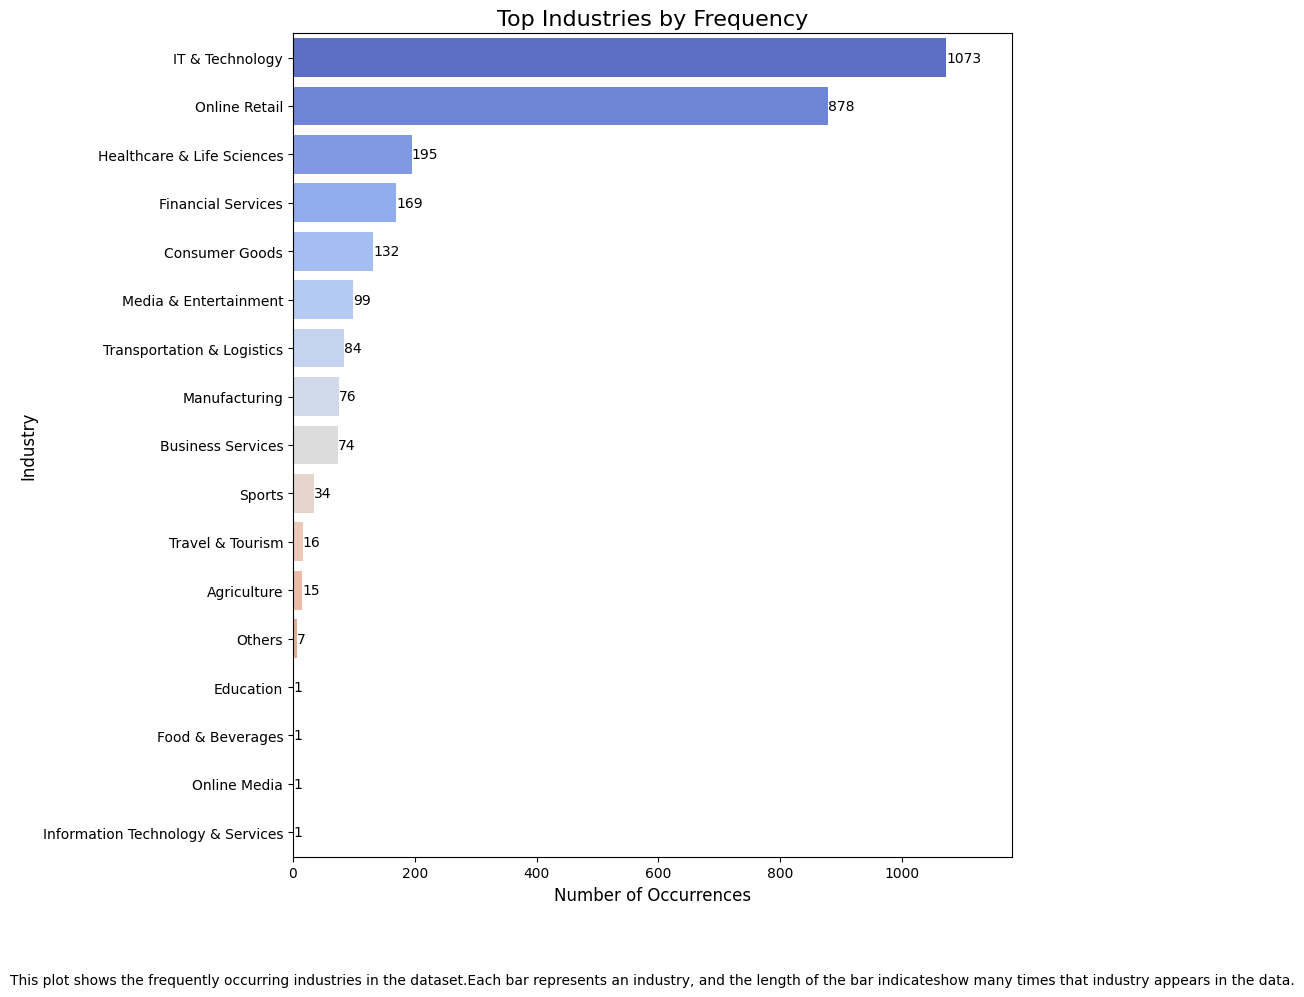

Univariate analysis of the 'industry' column completed with visualization.


In [62]:
# Conduct univariate analysis for the 'industry' column
industry_counts = allstartups['industry'].value_counts()

# Select top 20 industries for better visibility
top_industries = industry_counts.head(20)

# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(y=top_industries.index, x=top_industries.values, palette='coolwarm')

# Customize the plot
plt.title('Top Industries by Frequency', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Add value labels
for i, v in enumerate(top_industries.values):
    ax.text(v + 0.1, i, str(v), va='center')

# Adjust the scale
plt.xlim(0, max(top_industries.values) * 1.1)

# Add a text annotation explaining the plot
plt.text(0.5, -0.15, 
         "This plot shows the frequently occurring industries in the dataset.\
"
         "Each bar represents an industry, and the length of the bar indicates\
"
         "how many times that industry appears in the data.",
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("Univariate analysis of the 'industry' column completed with visualization.")

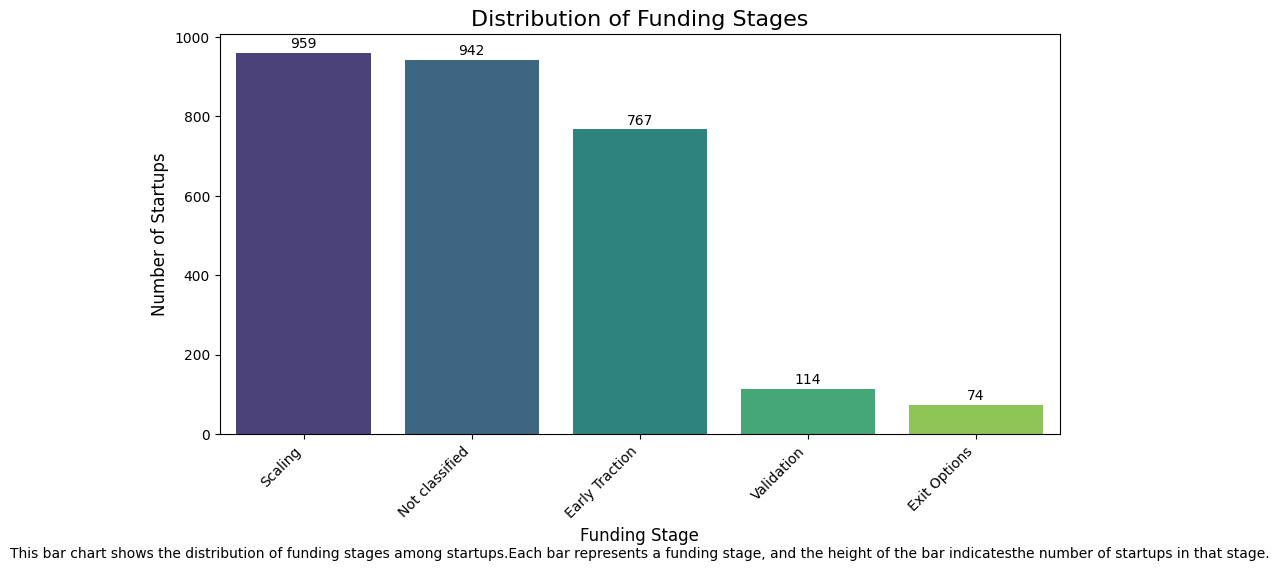

Visualizations for the 'funding_stage' column completed with annotations.


In [63]:
# FUNDING_STAGE
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each funding stage
funding_stage_counts = allstartups['funding_stage'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=funding_stage_counts.index, y=funding_stage_counts.values, palette="viridis")

# Customize the plot
plt.title('Distribution of Funding Stages', fontsize=16)
plt.xlabel('Funding Stage', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, v in enumerate(funding_stage_counts.values):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

# Add a text annotation explaining the plot
plt.text(0.5, -0.3, 
         "This bar chart shows the distribution of funding stages among startups.\
"
         "Each bar represents a funding stage, and the height of the bar indicates\
"
         "the number of startups in that stage.",
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("Visualizations for the 'funding_stage' column completed with annotations.")

In [64]:
#Amount_usd
import pandas as pd
import numpy as np
from scipy import stats

# Ensure the 'amount_usd' column is numeric
allstartups['amount_usd'] = pd.to_numeric(allstartups['amount_usd'], errors='coerce')

# Calculate statistics
mean = allstartups['amount_usd'].mean()
mode = allstartups['amount_usd'].mode().values[0]  # Get the first mode if there are multiple
median = allstartups['amount_usd'].median()
maximum = allstartups['amount_usd'].max()
minimum = allstartups['amount_usd'].min()
std_dev = allstartups['amount_usd'].std()
skewness = allstartups['amount_usd'].skew()
kurtosis = allstartups['amount_usd'].kurtosis()

# Print results
print(f"Mean: ${mean:,.2f}")
print(f"Mode: ${mode:,.2f}")
print(f"Median: ${median:,.2f}")
print(f"Maximum: ${maximum:,.2f}")
print(f"Minimum: ${minimum:,.2f}")
print(f"Standard Deviation: ${std_dev:,.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Calculate percentage of non-null values
non_null_percentage = (allstartups['amount_usd'].count() / len(allstartups)) * 100
print(f"\
Percentage of non-null values: {non_null_percentage:.2f}%")

Mean: $98,453,037.81
Mode: $3,000,000.00
Median: $3,000,000.00
Maximum: $150,000,000,000.00
Minimum: $876.00
Standard Deviation: $3,097,962,131.24
Skewness: 43.74
Kurtosis: 2012.07
Percentage of non-null values: 100.00%


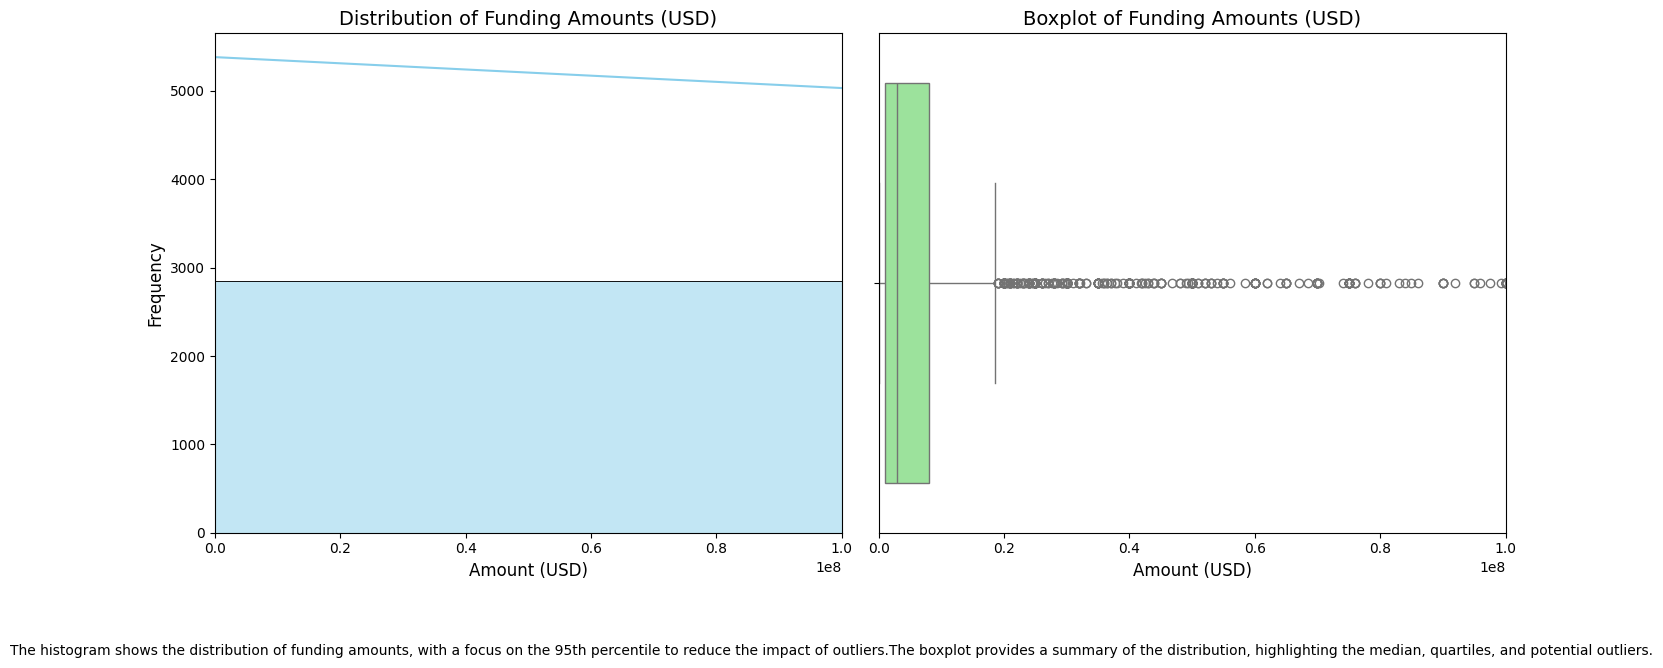

Visualizations for the 'amount_usd' column completed with annotations.


In [65]:
#amount
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram and a boxplot for the 'amount_usd' column
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(allstartups['amount_usd'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Funding Amounts (USD)', fontsize=14)
plt.xlabel('Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, allstartups['amount_usd'].quantile(0.95))  # Focus on the 95th percentile for better visualization

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=allstartups['amount_usd'], color='lightgreen')
plt.title('Boxplot of Funding Amounts (USD)', fontsize=14)
plt.xlabel('Amount (USD)', fontsize=12)
plt.xlim(0, allstartups['amount_usd'].quantile(0.95))  # Focus on the 95th percentile for better visualization

# Add annotations
plt.figtext(0.5, -0.1, 
            "The histogram shows the distribution of funding amounts, with a focus on the 95th percentile to reduce the impact of outliers.\
"
            "The boxplot provides a summary of the distribution, highlighting the median, quartiles, and potential outliers.",
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Visualizations for the 'amount_usd' column completed with annotations.")

0    thecollegefever is a hub for fun fiesta and fr...
1    a startup which aggregates milk from dairy far...
2            leading online loans marketplace in india
3    payme india is an innovative fintech organizat...
4    eunimart is a one stop solution for merchants ...
Name: description, dtype: object
Top 20 most frequent words:
           word  frequency
0      platform        686
1        online        297
2       company        289
3      provides        213
4        indias        211
5         india        192
6       startup        182
7    technology        150
8      products        146
9       digital        140
10    solutions        138
11       offers        126
12     services        125
13     learning        121
14          app        108
15        based        103
16  marketplace         91
17        brand         89
18   management         87
19           ai         84


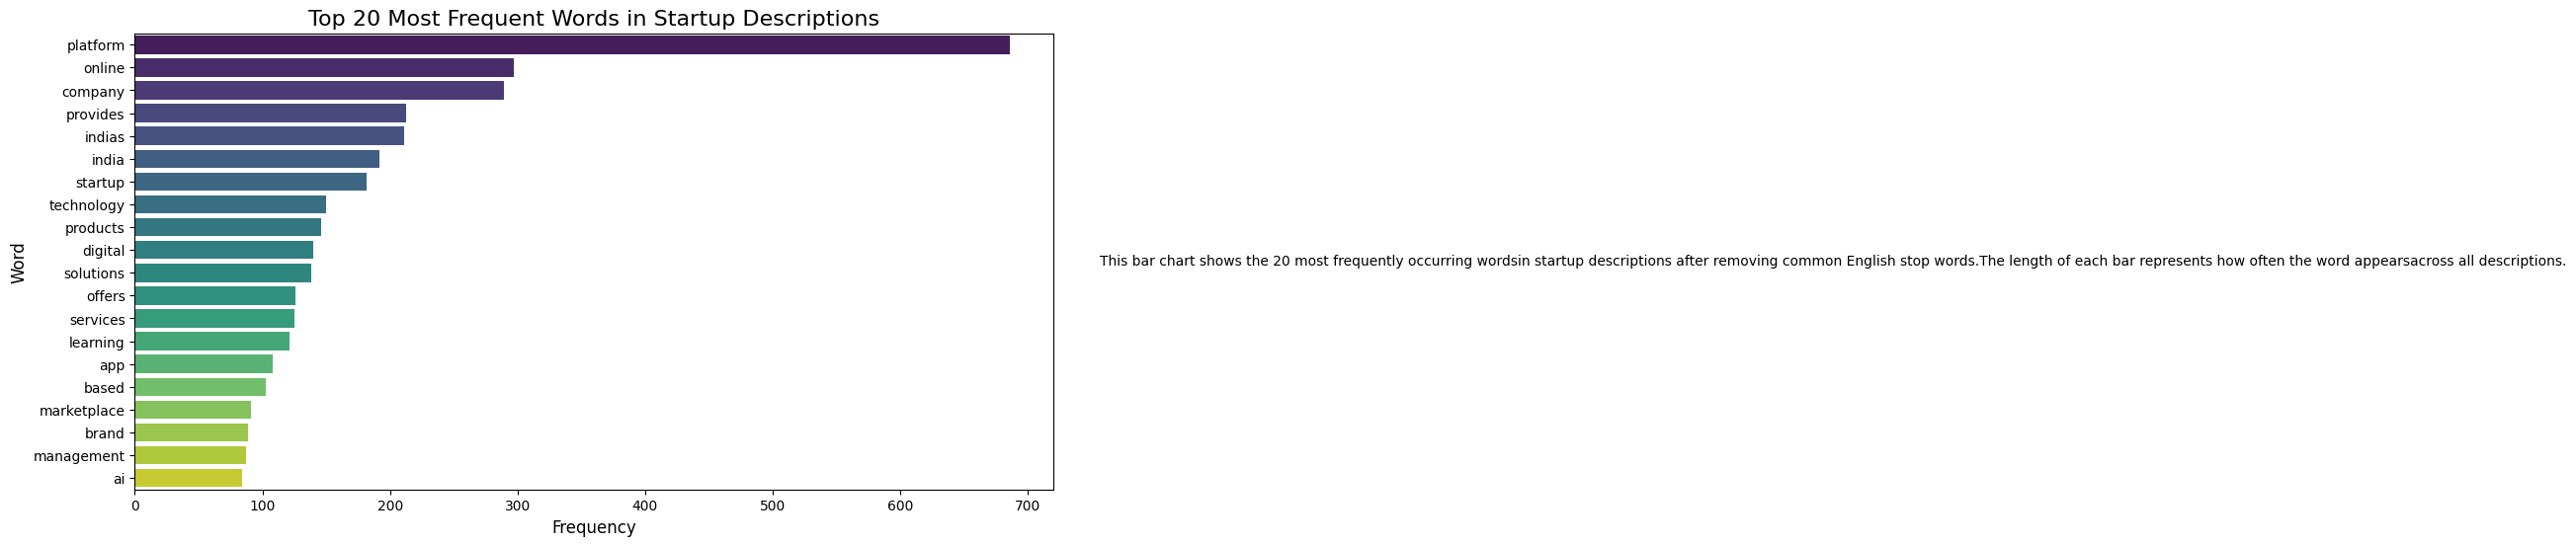

Visualization of the most frequent words in startup descriptions completed.


In [66]:
# DESCRIPTION
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the 'description' column from the CSV file
descriptions = allstartups['description'].dropna()

# Preprocess the text data: convert to lowercase and remove punctuation
preprocessed_descriptions = descriptions.str.lower().str.replace('[^a-z\s]', '', regex=True)

# Display the first few preprocessed descriptions
print(preprocessed_descriptions.head())


from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the preprocessed descriptions
word_count_matrix = vectorizer.fit_transform(preprocessed_descriptions)

# Get the words and their frequencies
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(),
                          'frequency': word_count_matrix.sum(axis=0).A1})

# Sort by frequency in descending order
word_freq = word_freq.sort_values('frequency', ascending=False).reset_index(drop=True)

# Display the top 20 most frequent words
print("Top 20 most frequent words:")
print(word_freq.head(20))

# Create a bar plot of the top 20 most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=word_freq.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Startup Descriptions', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)

# Add a text annotation explaining the plot
plt.text(1.05, 0.5, 
         "This bar chart shows the 20 most frequently occurring words\
"
         "in startup descriptions after removing common English stop words.\
"
         "The length of each bar represents how often the word appears\
"
         "across all descriptions.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("Visualization of the most frequent words in startup descriptions completed.")

In [67]:
# UNIVARIATE ANALYSS OF THE YEAR_FOUND COLUMN
import pandas as pd
import numpy as np

# Load the 'year_found' column from the CSV file
df = pd.read_csv('allstartups_copy.csv')
year_found = df['year_found']

# Check for missing values
missing_values = year_found.isnull().sum()
total_values = len(year_found)
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'year_found' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Display the first few values and data type
print("\
First few values of 'year_found':")
print(year_found.head())
print(f"\
Data type of 'year_found': {year_found.dtype}")

# Check for unique values
unique_values = year_found.nunique()
print(f"\
Number of unique values: {unique_values}")
print("\
Unique values:")
print(year_found.unique())

Total values in 'year_found' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
First few values of 'year_found':
0    2017.0
1    2017.0
2    2017.0
3    2017.0
4    2017.0
Name: year_found, dtype: float64
Data type of 'year_found': float64
Number of unique values: 34
Unique values:
[2017. 2014. 2004. 2013. 2010. 2018. 2019. 2011. 2015. 2016. 2012. 2008.
 2020. 1998. 2007. 1982. 2009. 1995. 2006. 1978. 1999. 1994. 2005. 1973.
 2002. 2001. 2021. 1993. 1989. 2000. 2003. 1991. 1984. 1963.]


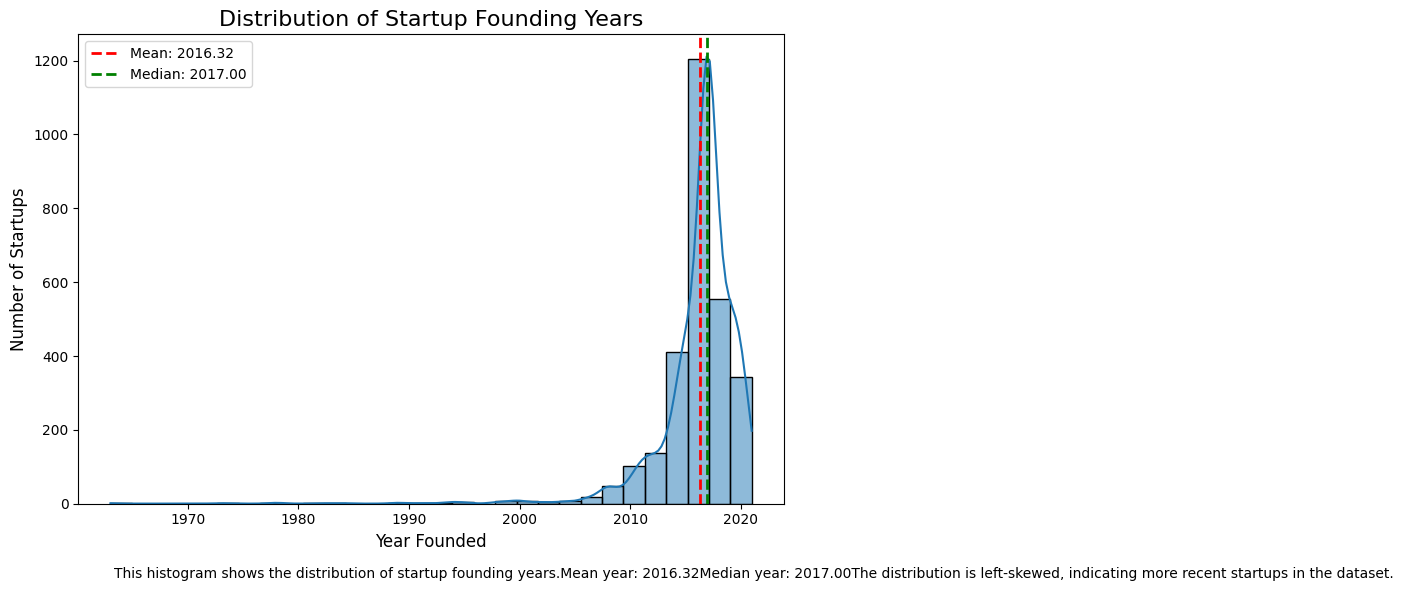

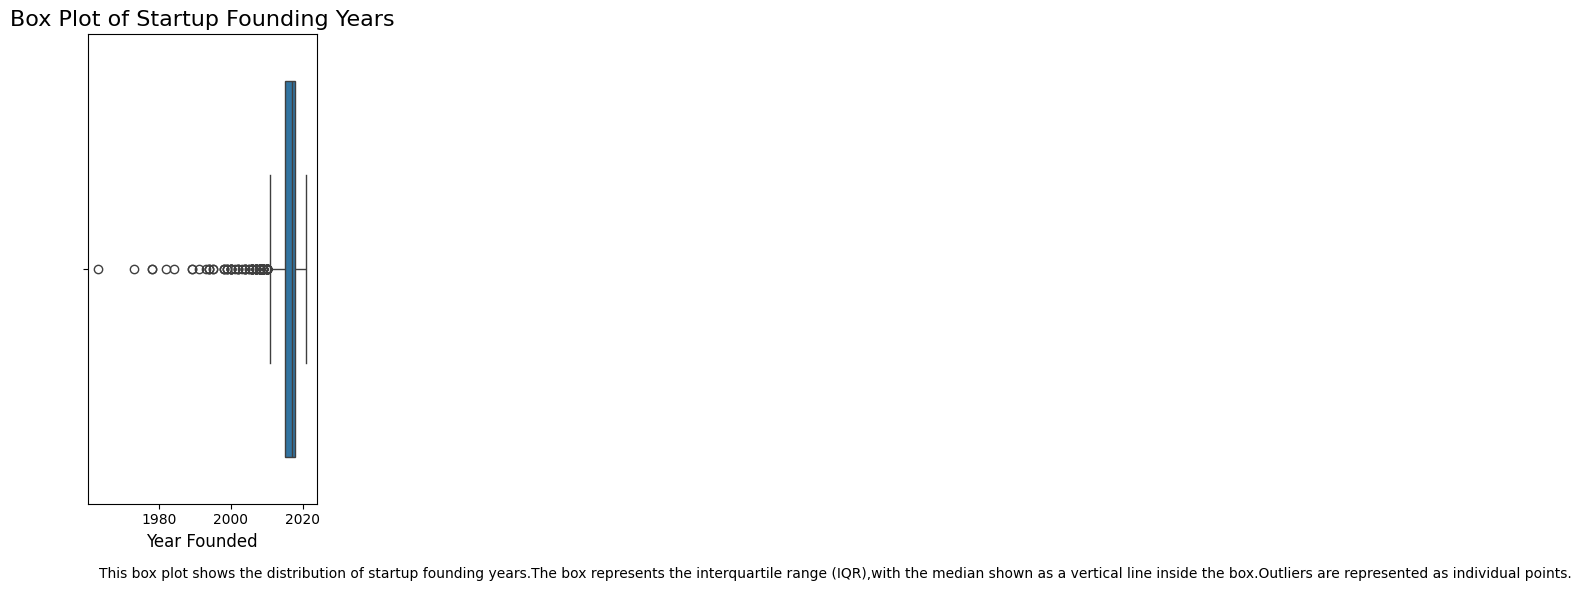

Summary Statistics for 'year_found':
count    2856.000000
mean     2016.317927
std         3.757599
min      1963.000000
25%      2015.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: year_found, dtype: float64
Skewness: -4.44
Kurtosis: 38.14


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'year_found' to integer type
allstartups['year_found'] = allstartups['year_found'].astype(int)

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='year_found', bins=30, kde=True)
plt.title('Distribution of Startup Founding Years', fontsize=16)
plt.xlabel('Year Founded', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add vertical lines for mean and median
mean_year = df['year_found'].mean()
median_year = df['year_found'].median()
plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_year:.2f}')
plt.axvline(median_year, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_year:.2f}')

plt.legend()

# Add annotations
plt.text(0.05, -0.15, 
         f"This histogram shows the distribution of startup founding years.\
"
         f"Mean year: {mean_year:.2f}\
"
         f"Median year: {median_year:.2f}\
"
         f"The distribution is left-skewed, indicating more recent startups in the dataset.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year_found'])
plt.title('Box Plot of Startup Founding Years', fontsize=16)
plt.xlabel('Year Founded', fontsize=12)

# Add annotations
plt.text(0.05, -0.15, 
         f"This box plot shows the distribution of startup founding years.\
"
         f"The box represents the interquartile range (IQR),\
"
         f"with the median shown as a vertical line inside the box.\
"
         f"Outliers are represented as individual points.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats = df['year_found'].describe()
print("Summary Statistics for 'year_found':")
print(summary_stats)

# Calculate skewness and kurtosis
skewness = df['year_found'].skew()
kurtosis = df['year_found'].kurtosis()
print(f"\
Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

In [69]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('allstartups_copy.csv')

# Check for missing values
missing_values = df['founders'].isnull().sum()
total_values = len(df['founders'])
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'founders' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Check for unique entries
unique_entries = df['founders'].nunique()
print(f"\
Number of unique entries: {unique_entries}")

# Display the first few unique entries
print("\
First few unique entries:")
print(df['founders'].unique()[:10])  # Displaying first 10 unique entries

# Check data type
print(f"\
Data type of 'founders' column: {df['founders'].dtype}")

Total values in 'founders' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
Number of unique entries: 1983
First few unique entries:
['Not recorded' 'Shantanu Deshpande'
 'Adamas Belva Syah Devara, Iman Usman.' 'Jatin Solanki'
 'Srikanth Iyer, Rama Harinath' 'Narayana Reddy Punyala' 'Nitin Gupta'
 'Vivek AG, Veekshith C Rai'
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa' 'Renuka Ramnath']
Data type of 'founders' column: object


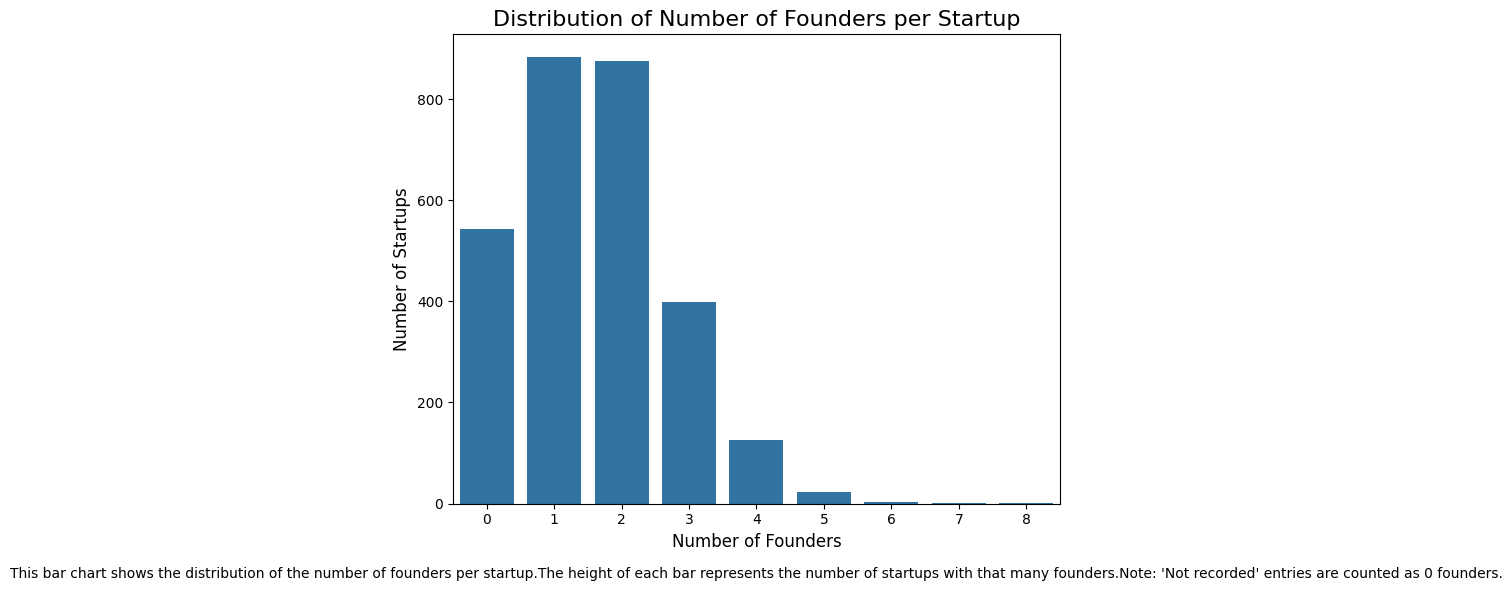

Statistics on number of founders:
count    2856.000000
mean        1.570028
std         1.147905
min         0.000000
25%         1.000000
50%         1.500000
75%         2.000000
max         8.000000
Name: founder_count, dtype: float64


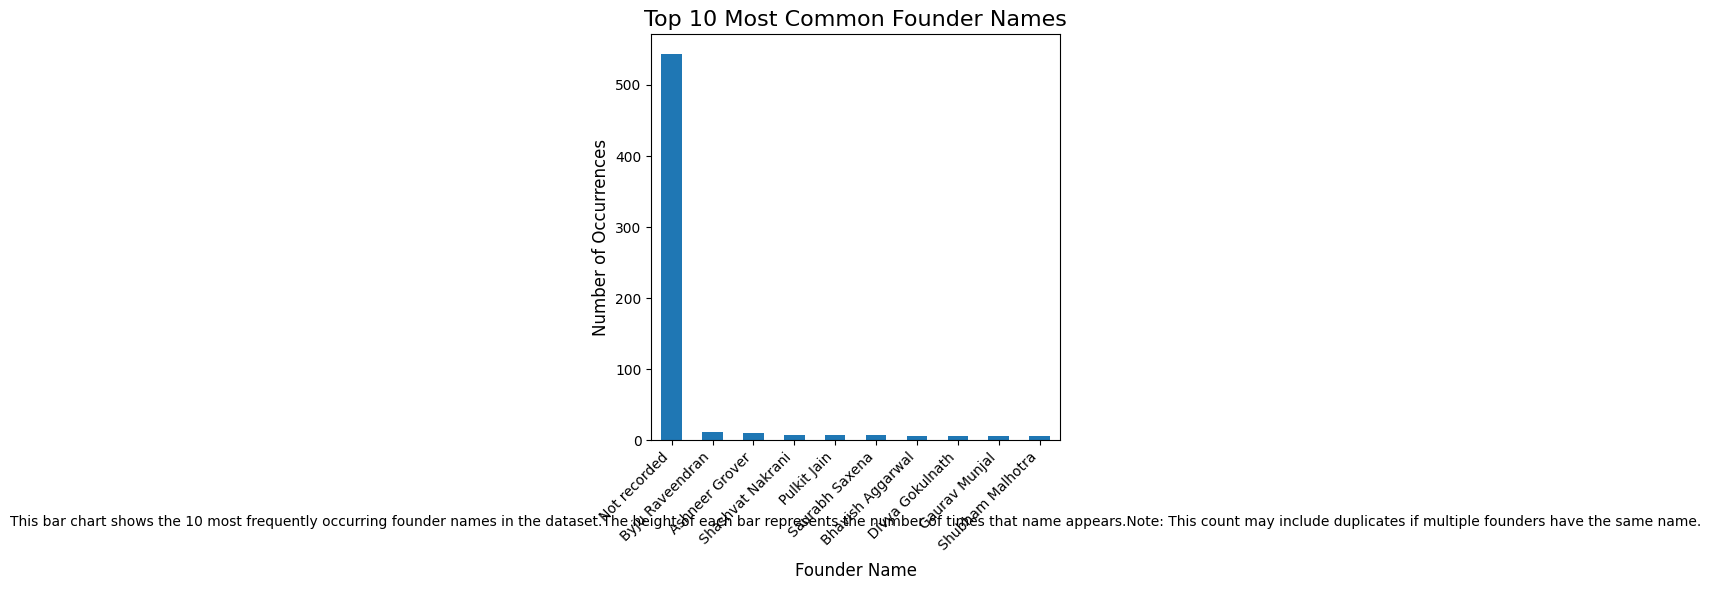

Top 10 most common founder names:
Not recorded         544
Byju Raveendran       12
Ashneer Grover        10
 Shashvat Nakrani      8
 Pulkit Jain           7
Saurabh Saxena         7
Bhavish Aggarwal       6
 Divya Gokulnath       6
Gaurav Munjal          6
 Shubham Malhotra      6
Name: count, dtype: int64


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count the number of founders
def count_founders(founders_string):
    if founders_string == 'Not recorded':
        return 0
    return len(founders_string.split(','))

# Apply the function to create a new column
df['founder_count'] = df['founders'].apply(count_founders)

# Plot the distribution of founder counts
plt.figure(figsize=(12, 6))
sns.countplot(x='founder_count', data=df)
plt.title('Distribution of Number of Founders per Startup', fontsize=16)
plt.xlabel('Number of Founders', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add annotations
plt.text(0.5, -0.15, 
         "This bar chart shows the distribution of the number of founders per startup.\
"
         "The height of each bar represents the number of startups with that many founders.\
"
         "Note: 'Not recorded' entries are counted as 0 founders.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and display some statistics
print("Statistics on number of founders:")
print(df['founder_count'].describe())

# Count the most common founder names
founder_names = df['founders'].str.split(',', expand=True).stack()
top_founders = founder_names.value_counts().head(10)

# Plot the top 10 most common founder names
plt.figure(figsize=(12, 6))
top_founders.plot(kind='bar')
plt.title('Top 10 Most Common Founder Names', fontsize=16)
plt.xlabel('Founder Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add annotations
plt.text(0.5, -0.2, 
         "This bar chart shows the 10 most frequently occurring founder names in the dataset.\
"
         "The height of each bar represents the number of times that name appears.\
"
         "Note: This count may include duplicates if multiple founders have the same name.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("\
Top 10 most common founder names:")
print(top_founders)

In [71]:
#UNIVARIATE ANALYSIS OF INVESTORS
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('allstartups_copy.csv')

# Check for missing values in the 'investors' column
missing_values = df['investors'].isnull().sum()
total_values = len(df['investors'])
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'investors' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Display the first few entries and data type
print("\
First few entries of 'investors':")
print(df['investors'].head())
print(f"\
Data type of 'investors': {df['investors'].dtype}")

# Check for unique values
unique_values = df['investors'].nunique()
print(f"\
Number of unique entries: {unique_values}")

Total values in 'investors' column: 2856
Missing values: 2
Percentage of missing values: 0.07%
First few entries of 'investors':
0    Not recorded
1    Not recorded
2    Not recorded
3    Not recorded
4    Not recorded
Name: investors, dtype: object
Data type of 'investors': object
Number of unique entries: 1776


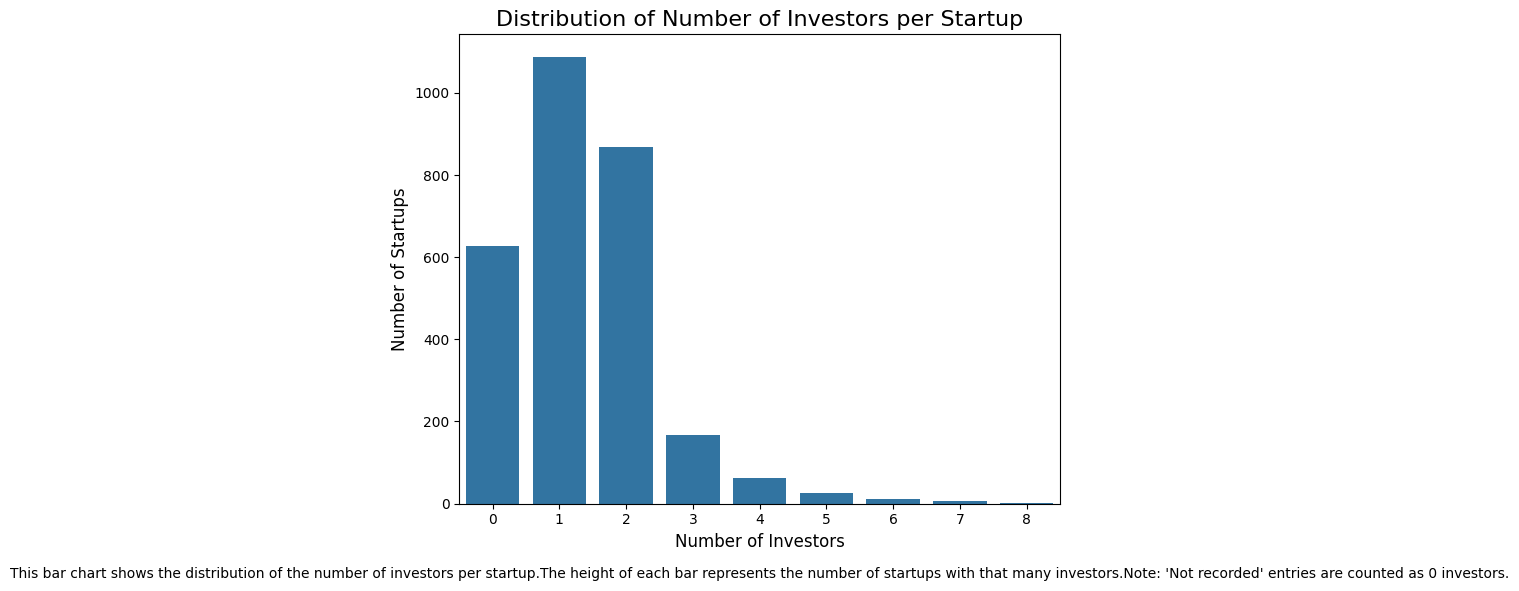

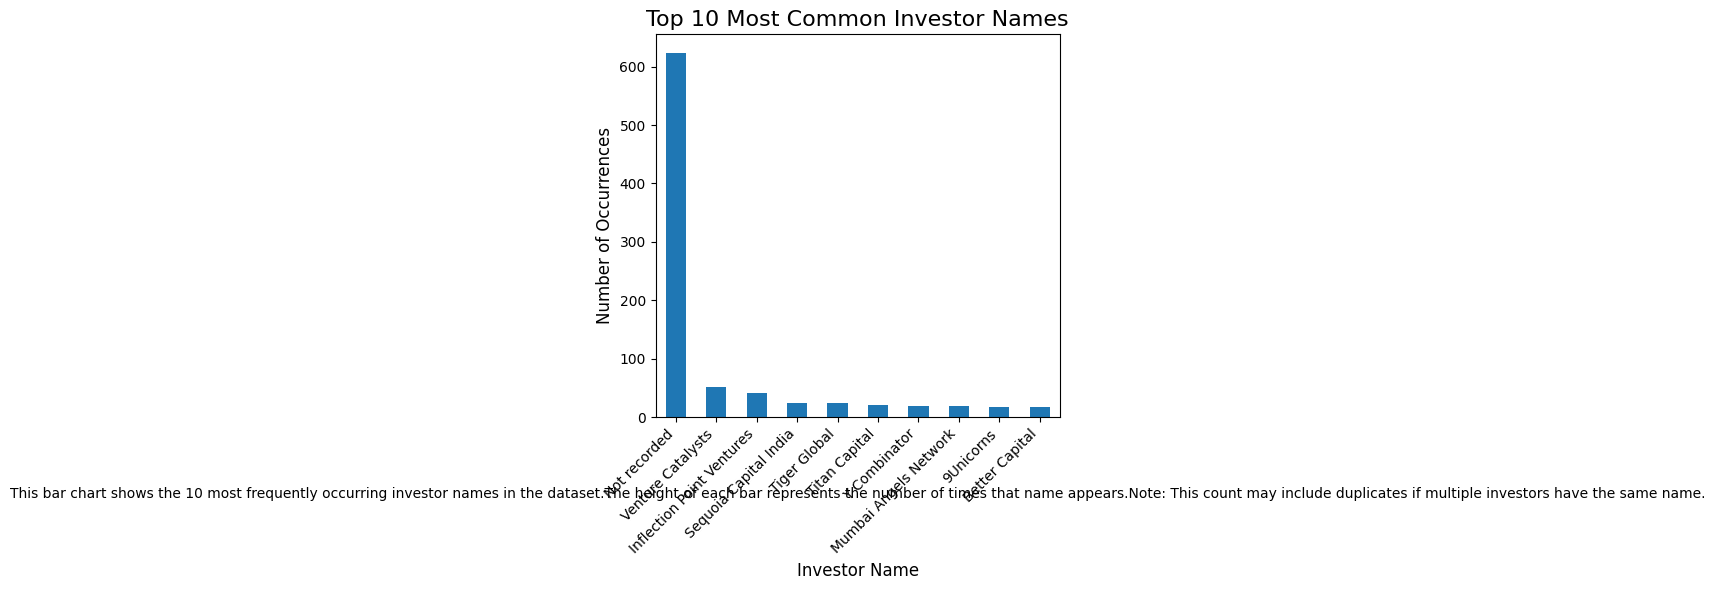

Top 10 most common investor names:
Not recorded                 624
Venture Catalysts             52
Inflection Point Ventures     41
Sequoia Capital India         25
Tiger Global                  24
Titan Capital                 21
Y Combinator                  20
Mumbai Angels Network         20
9Unicorns                     18
Better Capital                17
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count the number of investors
def count_investors(investors_string):
    if pd.isnull(investors_string) or investors_string == 'Not recorded':
        return 0
    return len(investors_string.split(','))

# Apply the function to create a new column
df['investor_count'] = df['investors'].apply(count_investors)

# Plot the distribution of investor counts
plt.figure(figsize=(12, 6))
sns.countplot(x='investor_count', data=df)
plt.title('Distribution of Number of Investors per Startup', fontsize=16)
plt.xlabel('Number of Investors', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add annotations
plt.text(0.5, -0.15, 
         "This bar chart shows the distribution of the number of investors per startup.\
"
         "The height of each bar represents the number of startups with that many investors.\
"
         "Note: 'Not recorded' entries are counted as 0 investors.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Count the most common investor names
investor_names = df['investors'].str.split(',', expand=True).stack()
top_investors = investor_names.value_counts().head(10)

# Plot the top 10 most common investor names
plt.figure(figsize=(12, 6))
top_investors.plot(kind='bar')
plt.title('Top 10 Most Common Investor Names', fontsize=16)
plt.xlabel('Investor Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add annotations
plt.text(0.5, -0.2, 
         "This bar chart shows the 10 most frequently occurring investor names in the dataset.\
"
         "The height of each bar represents the number of times that name appears.\
"
         "Note: This count may include duplicates if multiple investors have the same name.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("\
Top 10 most common investor names:")
print(top_investors)

In [73]:
#Univariate Analysis of the funding_year column
# Load the 'funding_year' column from the CSV file and check for missing values
funding_year = allstartups['funding_year']

# Check for missing values
missing_values = funding_year.isnull().sum()
total_values = len(funding_year)
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'funding_year' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Display the first few values and data type
print("\
First few values of 'funding_year':")
print(funding_year.head())
print(f"\
Data type of 'funding_year': {funding_year.dtype}")

Total values in 'funding_year' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
First few values of 'funding_year':
0    2018
1    2018
2    2018
3    2018
4    2018
Name: funding_year, dtype: object
Data type of 'funding_year': object


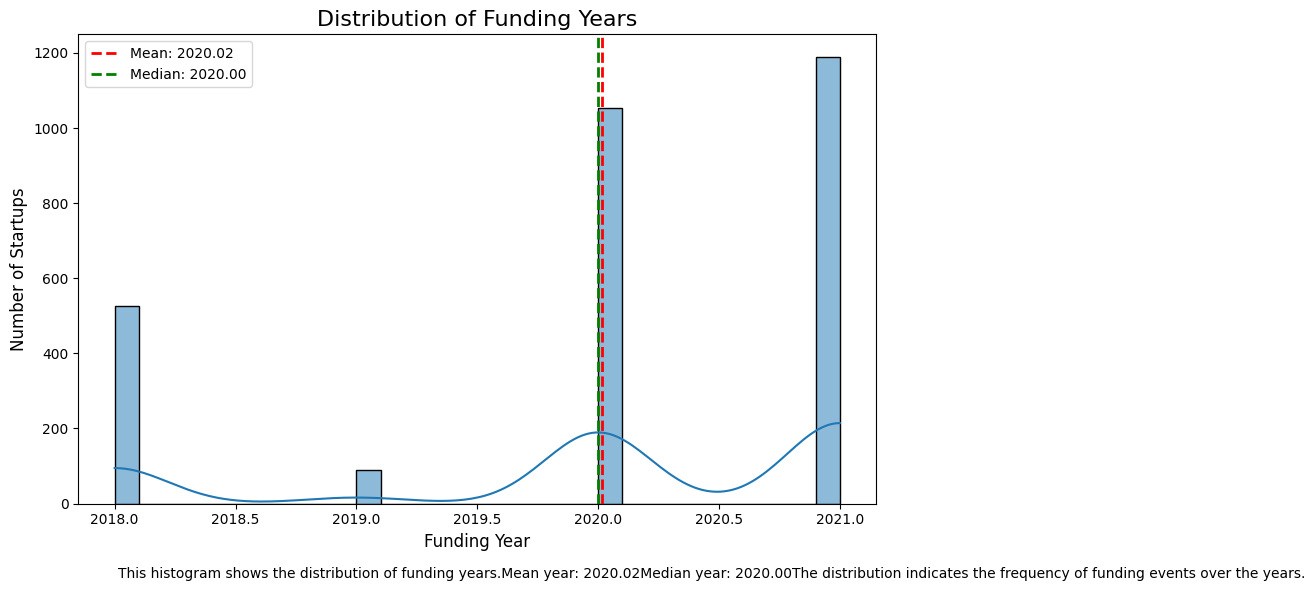

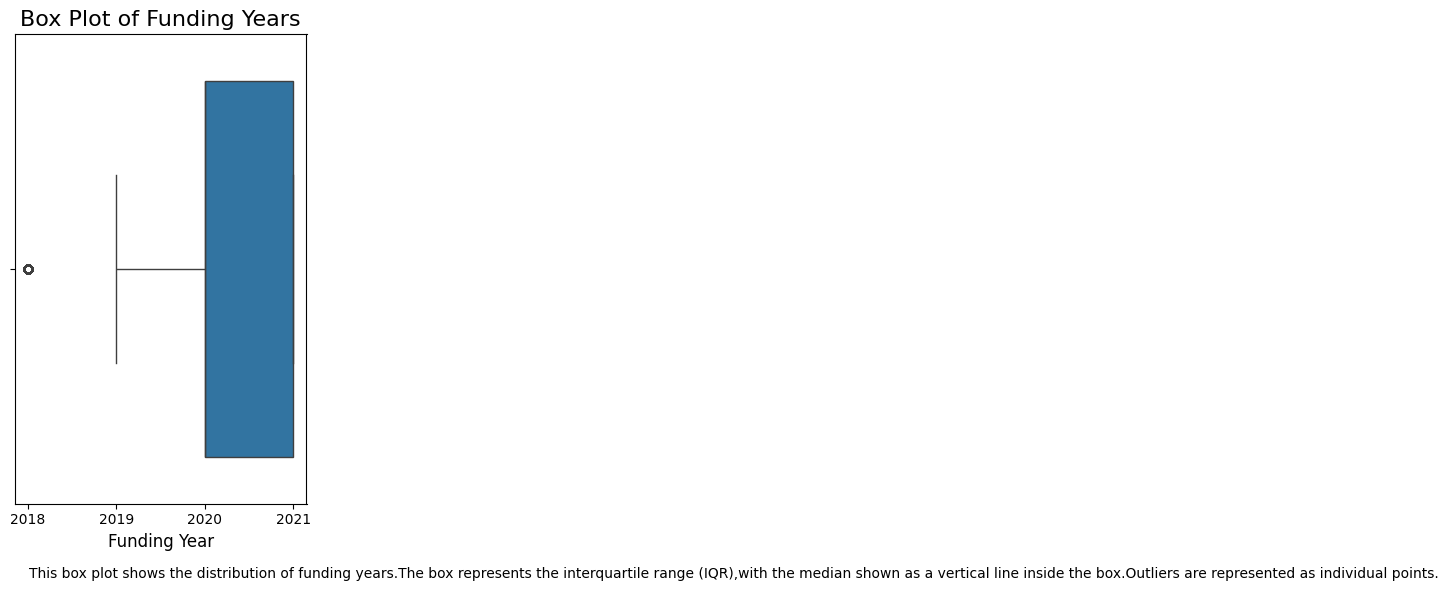

Summary Statistics for 'funding_year':
count    2856.000000
mean     2020.017857
std         1.087759
min      2018.000000
25%      2020.000000
50%      2020.000000
75%      2021.000000
max      2021.000000
Name: funding_year, dtype: float64
Skewness: -0.89
Kurtosis: -0.52


In [74]:
#univaraite analysis - funding year 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of funding years
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='funding_year', bins=30, kde=True)
plt.title('Distribution of Funding Years', fontsize=16)
plt.xlabel('Funding Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add vertical lines for mean and median
mean_year = df['funding_year'].mean()
median_year = df['funding_year'].median()
plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_year:.2f}')
plt.axvline(median_year, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_year:.2f}')

plt.legend()

# Add annotations
plt.text(0.05, -0.15, 
         f"This histogram shows the distribution of funding years.\
"
         f"Mean year: {mean_year:.2f}\
"
         f"Median year: {median_year:.2f}\
"
         f"The distribution indicates the frequency of funding events over the years.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['funding_year'])
plt.title('Box Plot of Funding Years', fontsize=16)
plt.xlabel('Funding Year', fontsize=12)

# Add annotations
plt.text(0.05, -0.15, 
         f"This box plot shows the distribution of funding years.\
"
         f"The box represents the interquartile range (IQR),\
"
         f"with the median shown as a vertical line inside the box.\
"
         f"Outliers are represented as individual points.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats = df['funding_year'].describe()
print("Summary Statistics for 'funding_year':")
print(summary_stats)

# Calculate skewness and kurtosis
skewness = df['funding_year'].skew()
kurtosis = df['funding_year'].kurtosis()
print(f"\
Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

In [75]:
#univariate analysis of city column
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('allstartups_copy.csv')

# Check for missing values in the 'city' column
missing_values = df['city'].isnull().sum()
total_values = len(df['city'])
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'city' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Check for unique entries
unique_cities = df['city'].nunique()
print(f"\
Number of unique cities: {unique_cities}")

# Display the top 10 most common cities
top_cities = df['city'].value_counts().head(10)
print("\
Top 10 most common cities:")
print(top_cities)

# Display the first few unique entries
print("\
First few unique cities:")
print(df['city'].unique()[:10])  # Displaying first 10 unique cities

# Check data type
print(f"\
Data type of 'city' column: {df['city'].dtype}")

Total values in 'city' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
Number of unique cities: 101
Top 10 most common cities:
city
Bengaluru       921
Mumbai          475
NCT Delhi       321
Gurugram        319
Not Recorded    127
Chennai         108
Pune            104
Noida            86
Hyderabad        76
Ahmedabad        35
Name: count, dtype: int64
First few unique cities:
['Bengaluru' 'Mumbai' 'Gurugram' 'Noida' 'Hyderabad' 'NCT Delhi'
 'Not Recorded' 'Hubballi' 'Chennai' 'Sahibzada Ajit Singh Nagar']
Data type of 'city' column: object


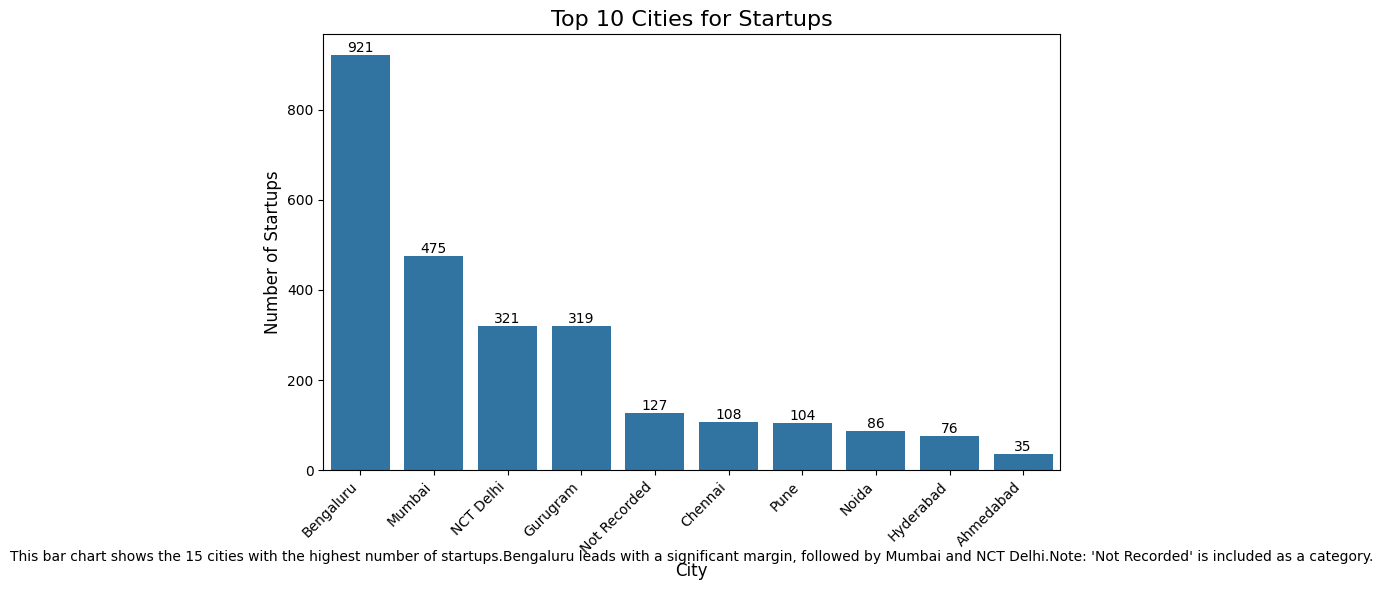

Statistics on startup distribution:
Total number of startups: 2856
Number of startups in top 5 cities: 2163
Percentage of startups in top 5 cities: 75.74%
Percentage of startups in each of the top 5 cities:
Bengaluru: 32.25%
Mumbai: 16.63%
NCT Delhi: 11.24%
Gurugram: 11.17%
Not Recorded: 4.45%


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the top 15 cities
plt.figure(figsize=(12, 6))
top_10_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)
plt.title('Top 10 Cities for Startups', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_10_cities.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add annotations
plt.text(0.5, -0.2, 
         "This bar chart shows the 15 cities with the highest number of startups.\
"
         "Bengaluru leads with a significant margin, followed by Mumbai and NCT Delhi.\
"
         "Note: 'Not Recorded' is included as a category.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print some statistics
total_startups = len(df)
top_5_cities = df['city'].value_counts().head(5)
top_5_percentage = (top_5_cities.sum() / total_startups) * 100

print("Statistics on startup distribution:")
print(f"Total number of startups: {total_startups}")
print(f"Number of startups in top 5 cities: {top_5_cities.sum()}")
print(f"Percentage of startups in top 5 cities: {top_5_percentage:.2f}%")
print("\
Percentage of startups in each of the top 5 cities:")
for city, count in top_5_cities.items():
    percentage = (count / total_startups) * 100
    print(f"{city}: {percentage:.2f}%")

In [77]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('allstartups_copy.csv')

# Check for missing values in the 'state' column
state_column = df['state']
missing_values = state_column.isnull().sum()
total_values = len(state_column)
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'state' column: {total_values}")
print(f"Missing values: {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Check for unique entries
unique_states = state_column.nunique()
print(f"\
Number of unique states: {unique_states}")

# Display the top 10 most common states
top_states = state_column.value_counts().head(10)
print("\
Top 10 most common states:")
print(top_states)

# Check data type
print(f"\
Data type of 'state' column: {state_column.dtype}")

Total values in 'state' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
Number of unique states: 43
Top 10 most common states:
state
Karnataka                     926
Maharashtra                   597
Haryana                       361
National Capital Territory    321
Not Recorded                  127
Tamil Nadu                    117
Uttar Pradesh                 100
Telangana                      80
Gujarat                        49
Rajasthan                      40
Name: count, dtype: int64
Data type of 'state' column: object


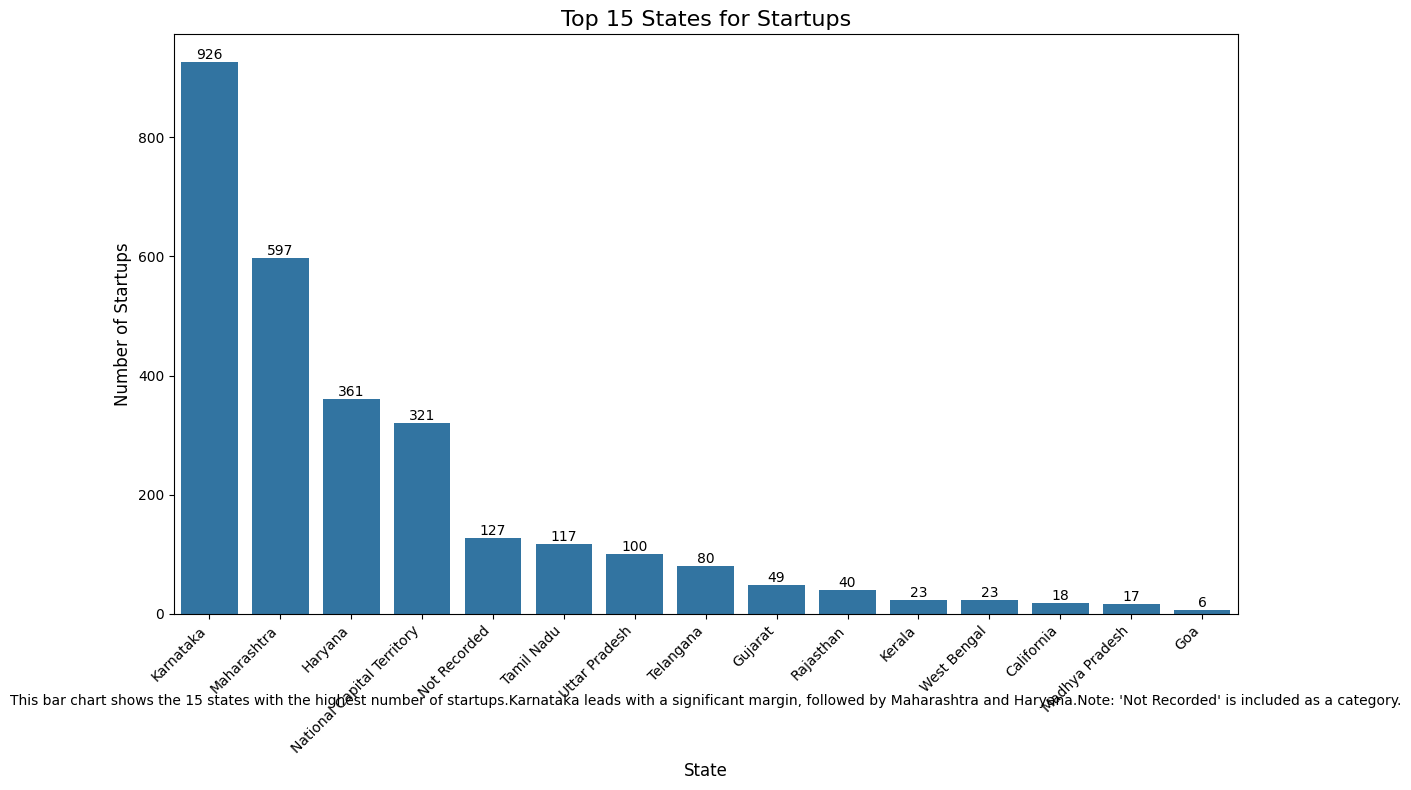

Statistics on startup distribution by state:
Total number of startups: 2856
Number of startups in top 5 states: 2332
Percentage of startups in top 5 states: 81.65%
Percentage of startups in each of the top 5 states:
Karnataka: 32.42%
Maharashtra: 20.90%
Haryana: 12.64%
National Capital Territory: 11.24%
Not Recorded: 4.45%


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the top 15 states
plt.figure(figsize=(14, 8))
top_15_states = df['state'].value_counts().head(15)
sns.barplot(x=top_15_states.index, y=top_15_states.values)
plt.title('Top 15 States for Startups', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_15_states.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add annotations
plt.text(0.5, -0.15, 
         "This bar chart shows the 15 states with the highest number of startups.\
"
         "Karnataka leads with a significant margin, followed by Maharashtra and Haryana.\
"
         "Note: 'Not Recorded' is included as a category.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print some statistics
total_startups = len(df)
top_5_states = df['state'].value_counts().head(5)
top_5_percentage = (top_5_states.sum() / total_startups) * 100

print("Statistics on startup distribution by state:")
print(f"Total number of startups: {total_startups}")
print(f"Number of startups in top 5 states: {top_5_states.sum()}")
print(f"Percentage of startups in top 5 states: {top_5_percentage:.2f}%")
print("\
Percentage of startups in each of the top 5 states:")
for state, count in top_5_states.items():
    percentage = (count / total_startups) * 100
    print(f"{state}: {percentage:.2f}%")

In [79]:
# Univariate Analysis of Country
# Load the 'country' column and check for missing values
country_column = df['country']

# Check for missing values
missing_values_country = country_column.isnull().sum()
total_values_country = len(country_column)
missing_percentage_country = (missing_values_country / total_values_country) * 100

print(f"Total values in 'country' column: {total_values_country}")
print(f"Missing values: {missing_values_country}")
print(f"Percentage of missing values: {missing_percentage_country:.2f}%")

# Check for unique entries
unique_countries = country_column.nunique()
print(f"\
Number of unique countries: {unique_countries}")

# Display the top 10 most common countries
top_countries = country_column.value_counts().head(10)
print("\
Top 10 most common countries:")
print(top_countries)

# Check data type
print(f"\
Data type of 'country' column: {country_column.dtype}")

Total values in 'country' column: 2856
Missing values: 0
Percentage of missing values: 0.00%
Number of unique countries: 14
Top 10 most common countries:
country
India             2807
United States       25
United Kingdom       5
Singapore            4
Australia            3
China                3
France               2
Bangladesh           1
Italy                1
Indonesia            1
Name: count, dtype: int64
Data type of 'country' column: object


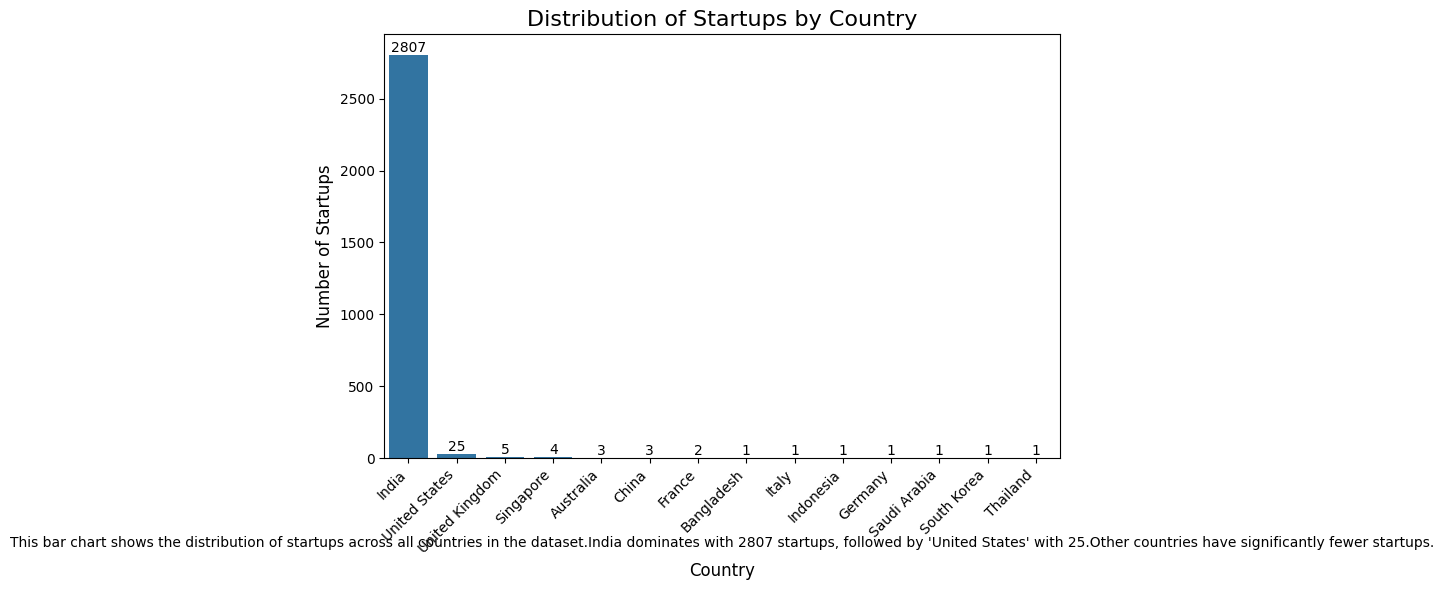

Statistics on startup distribution by country:
Total number of startups: 2856
Number of startups in India: 2807
Number of startups in other countries: 49
Percentage of startups in India: 98.28%
Percentage of startups in other countries: 1.72%


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of all countries
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Startups by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(country_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add annotations
plt.text(0.5, -0.2, 
         "This bar chart shows the distribution of startups across all countries in the dataset.\
"
         "India dominates with 2807 startups, followed by 'United States' with 25.\
"
         "Other countries have significantly fewer startups.",
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print some statistics
total_startups = len(df)
india_startups = country_counts['India']
other_countries_total = total_startups - india_startups

print("Statistics on startup distribution by country:")
print(f"Total number of startups: {total_startups}")
print(f"Number of startups in India: {india_startups}")
print(f"Number of startups in other countries: {other_countries_total}")
print(f"\
Percentage of startups in India: {(india_startups / total_startups) * 100:.2f}%")
print(f"Percentage of startups in other countries: {(other_countries_total / total_startups) * 100:.2f}%")

In [81]:
#BIVARIATE ANALYSIS
# Identify numerical columns in the dataset
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Display the numerical columns
print("Numerical columns in the dataset:")
print(df_numerical.columns)

# Display the first few rows of the numerical data
print("\
First few rows of numerical data:")
print(df_numerical.head())

Numerical columns in the dataset:
Index(['amount_usd', 'year_found', 'funding_year'], dtype='object')
First few rows of numerical data:
   amount_usd  year_found  funding_year
0    250000.0      2017.0          2018
1    584000.0      2017.0          2018
2    949000.0      2017.0          2018
3   2000000.0      2017.0          2018
4   3000000.0      2017.0          2018


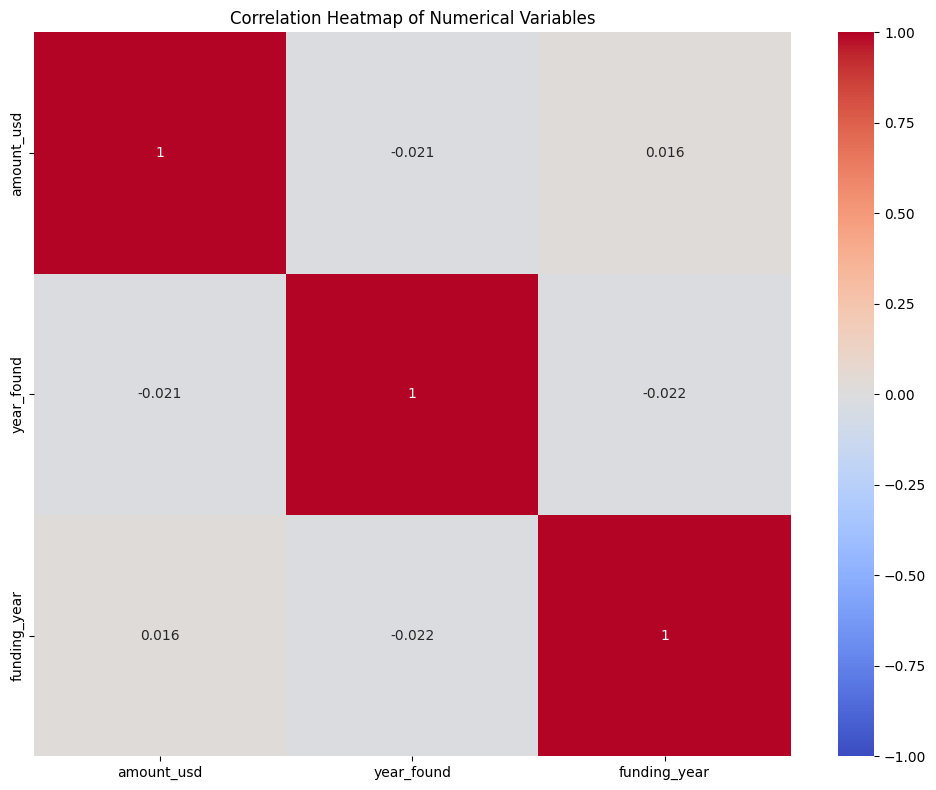

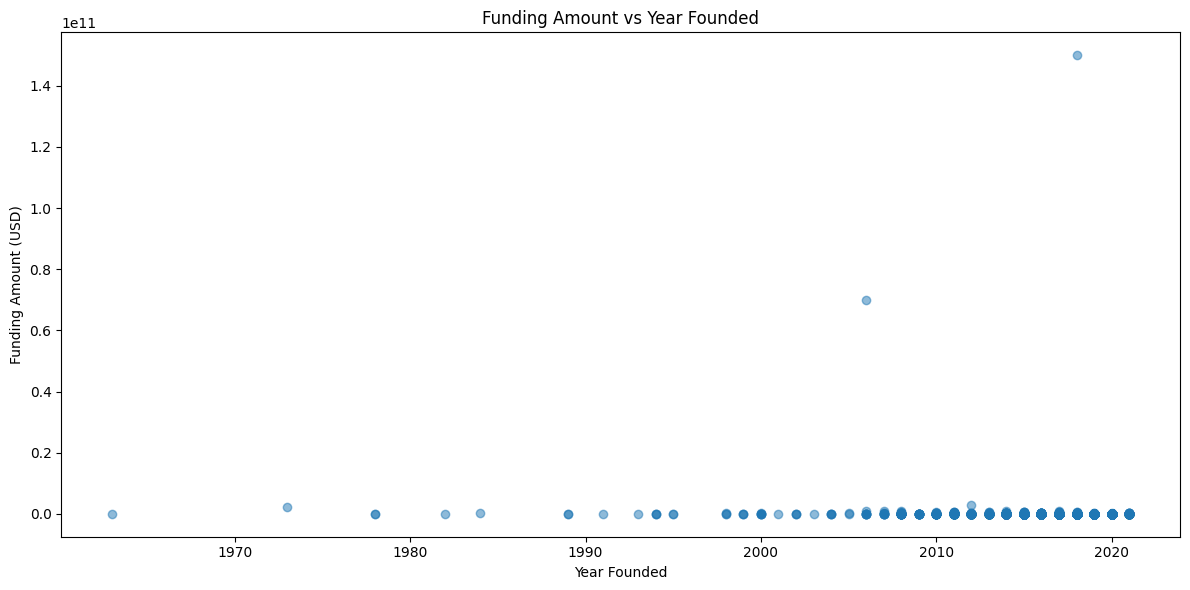

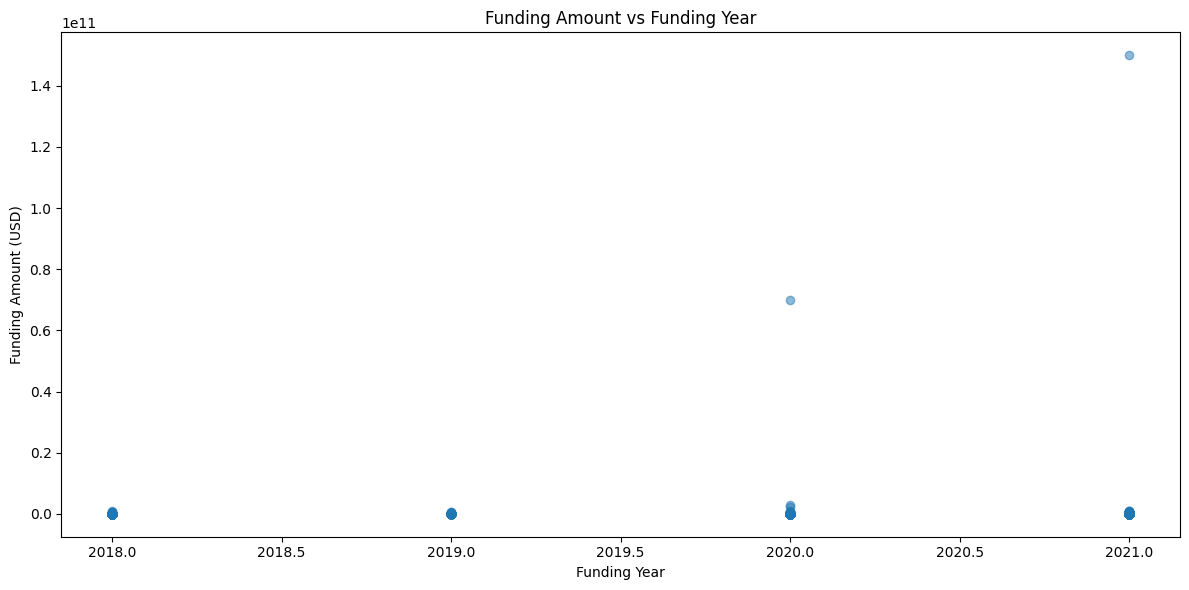

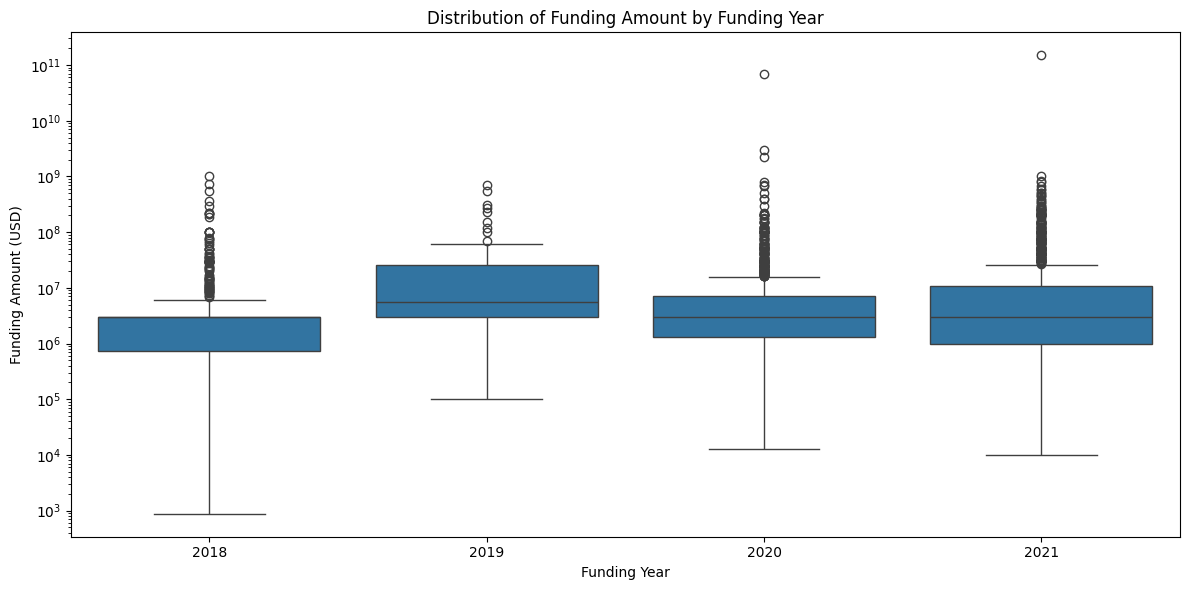

Summary statistics of numerical variables:
         amount_usd   year_found  funding_year
count  2.856000e+03  2856.000000   2856.000000
mean   9.845304e+07  2016.317927   2020.017857
std    3.097962e+09     3.757599      1.087759
min    8.760000e+02  1963.000000   2018.000000
25%    1.000000e+06  2015.000000   2020.000000
50%    3.000000e+06  2017.000000   2020.000000
75%    8.000000e+06  2018.000000   2021.000000
max    1.500000e+11  2021.000000   2021.000000
Average funding amount by year founded:
year_found
1963.0    6.000000e+07
1973.0    2.200000e+09
1978.0    4.250000e+07
1982.0    2.100000e+07
1984.0    2.340000e+08
1989.0    3.000000e+06
1991.0    5.000000e+07
1993.0    4.000000e+07
1994.0    2.066667e+07
1995.0    2.650000e+07
1998.0    3.453333e+07
1999.0    2.600000e+07
2000.0    3.766667e+07
2001.0    3.000000e+06
2002.0    1.390000e+07
2003.0    1.000000e+06
2004.0    1.050000e+07
2005.0    2.020000e+08
2006.0    7.873024e+09
2007.0    1.437060e+08
2008.0    9.880141e+07


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# Scatter plot: amount_usd vs year_found
plt.figure(figsize=(12, 6))
plt.scatter(df_numerical['year_found'], df_numerical['amount_usd'], alpha=0.5)
plt.title('Funding Amount vs Year Founded')
plt.xlabel('Year Founded')
plt.ylabel('Funding Amount (USD)')
plt.tight_layout()
plt.show()

# Scatter plot: amount_usd vs funding_year
plt.figure(figsize=(12, 6))
plt.scatter(df_numerical['funding_year'], df_numerical['amount_usd'], alpha=0.5)
plt.title('Funding Amount vs Funding Year')
plt.xlabel('Funding Year')
plt.ylabel('Funding Amount (USD)')
plt.tight_layout()
plt.show()

# Box plot: amount_usd by funding_year
plt.figure(figsize=(12, 6))
sns.boxplot(x='funding_year', y='amount_usd', data=df_numerical)
plt.title('Distribution of Funding Amount by Funding Year')
plt.xlabel('Funding Year')
plt.ylabel('Funding Amount (USD)')
plt.yscale('log')  # Using log scale for better visualization
plt.tight_layout()
plt.show()

# Calculate summary statistics
summary_stats = df_numerical.describe()
print("Summary statistics of numerical variables:")
print(summary_stats)

# Calculate the average funding amount by year founded
avg_funding_by_year_found = df_numerical.groupby('year_found')['amount_usd'].mean().sort_index()
print("\
Average funding amount by year founded:")
print(avg_funding_by_year_found)

# Calculate the average funding amount by funding year
avg_funding_by_funding_year = df_numerical.groupby('funding_year')['amount_usd'].mean().sort_index()
print("\
Average funding amount by funding year:")
print(avg_funding_by_funding_year)

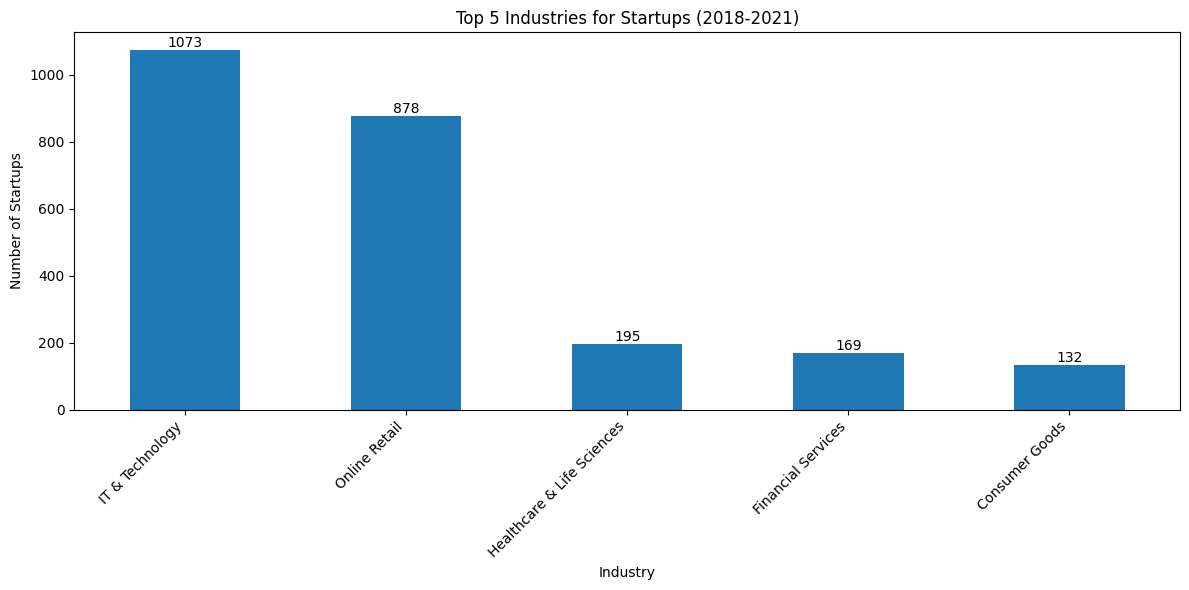

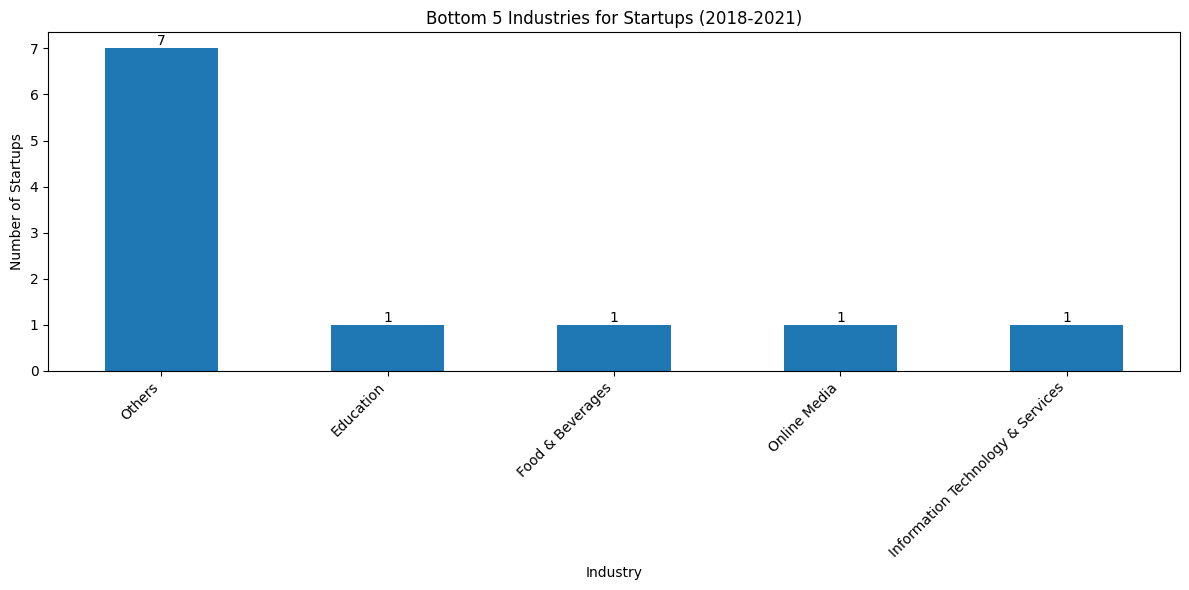

Top 5 Industries for Startups (2018-2021):
industry
IT & Technology               1073
Online Retail                  878
Healthcare & Life Sciences     195
Financial Services             169
Consumer Goods                 132
Name: count, dtype: int64
Bottom 5 Industries for Startups (2018-2021):
industry
Others                               7
Education                            1
Food & Beverages                     1
Online Media                         1
Information Technology & Services    1
Name: count, dtype: int64
Percentage of startups in top 5 industries: 85.68%
Percentage of startups in bottom 5 industries: 0.39%


In [83]:
# BUSINESS QUESTIONS 
#Question 1
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the years 2018-2021
df_filtered = df[(df['funding_year'] >= 2018) & (df['funding_year'] <= 2021)]

# Count the number of startups in each industry
industry_counts = df_filtered['industry'].value_counts()

# Get the top 5 and bottom 5 industries
top_5_industries = industry_counts.head(5)
bottom_5_industries = industry_counts.tail(5)

# Create a bar plot for the top 5 industries
plt.figure(figsize=(12, 6))
top_5_industries.plot(kind='bar')
plt.title('Top 5 Industries for Startups (2018-2021)')
plt.xlabel('Industry')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_5_industries):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Create a bar plot for the bottom 5 industries
plt.figure(figsize=(12, 6))
bottom_5_industries.plot(kind='bar')
plt.title('Bottom 5 Industries for Startups (2018-2021)')
plt.xlabel('Industry')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(bottom_5_industries):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Print the results
print("Top 5 Industries for Startups (2018-2021):")
print(top_5_industries)

print("\
Bottom 5 Industries for Startups (2018-2021):")
print(bottom_5_industries)

# Calculate the percentage of startups in each category
total_startups = industry_counts.sum()
top_5_percentage = (top_5_industries.sum() / total_startups) * 100
bottom_5_percentage = (bottom_5_industries.sum() / total_startups) * 100

print(f"\
Percentage of startups in top 5 industries: {top_5_percentage:.2f}%")
print(f"Percentage of startups in bottom 5 industries: {bottom_5_percentage:.2f}%")


In [84]:
# Question 2
# Filter the dataset for the years 2018 to 2021
df_filtered_cities = df[(df['funding_year'] >= 2018) & (df['funding_year'] <= 2021)]

# Count the number of startups in each city
city_counts = df_filtered_cities['city'].value_counts()

# Display the city counts to verify
print("City counts for startups (2018-2021):")
print(city_counts.head(10))  # Display top 10 for a quick check
print(city_counts.tail(10))  # Display bottom 10 for a quick check

# Proceed to identify top and bottom 5 cities
print("done")

City counts for startups (2018-2021):
city
Bengaluru       921
Mumbai          475
NCT Delhi       321
Gurugram        319
Not Recorded    127
Chennai         108
Pune            104
Noida            86
Hyderabad        76
Ahmedabad        35
Name: count, dtype: int64
city
France                 1
Irvine                 1
Tumkur                 1
Newcastle upon Tyne    1
Shanghai               1
Jiaxing                1
Ludhiana               1
Dehradun               1
Tangerang              1
Gandhinagar            1
Name: count, dtype: int64
done


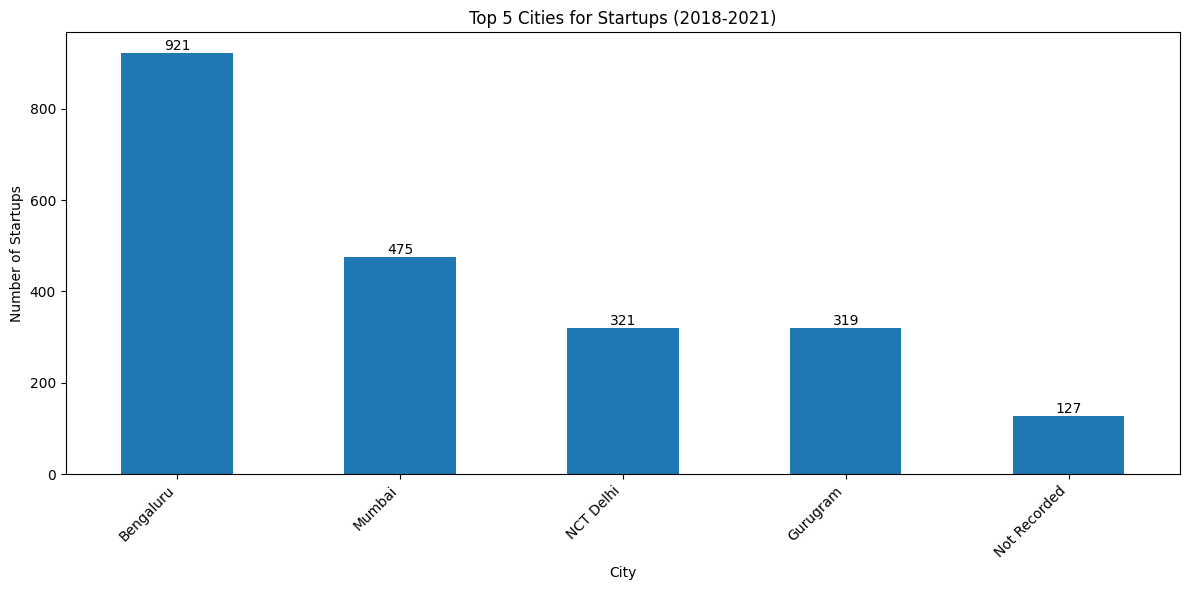

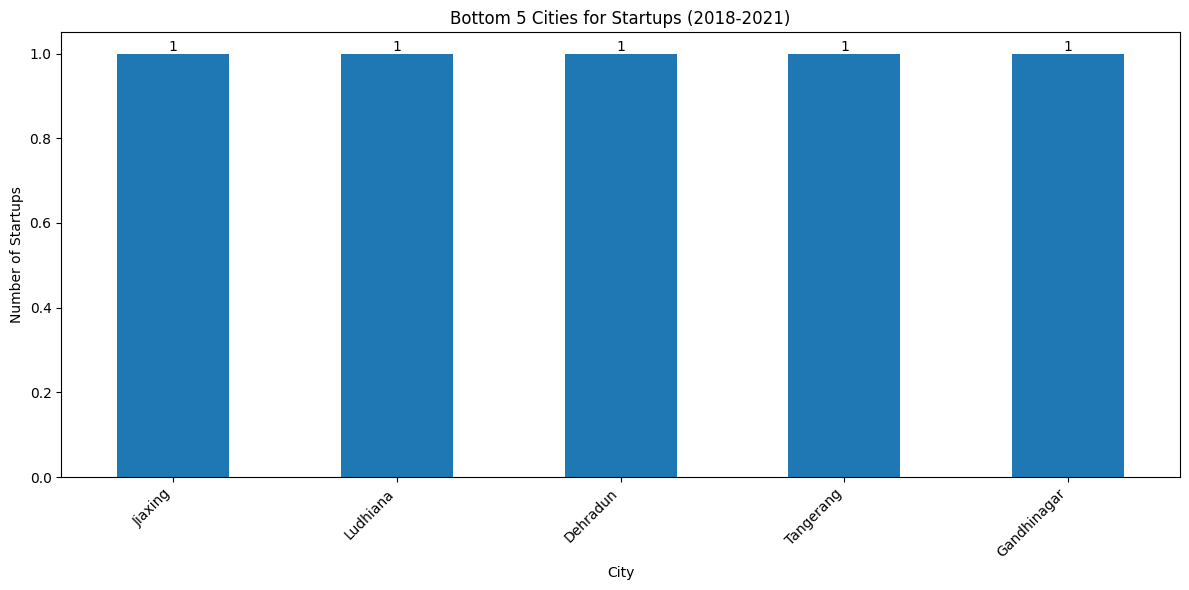

Top 5 Cities for Startups (2018-2021):
city
Bengaluru       921
Mumbai          475
NCT Delhi       321
Gurugram        319
Not Recorded    127
Name: count, dtype: int64
Bottom 5 Cities for Startups (2018-2021):
city
Jiaxing        1
Ludhiana       1
Dehradun       1
Tangerang      1
Gandhinagar    1
Name: count, dtype: int64
Percentage of startups in top 5 cities: 75.74%
Percentage of startups in bottom 5 cities: 0.18%


In [85]:
import matplotlib.pyplot as plt

# Get the top 5 and bottom 5 cities
top_5_cities = city_counts.head(5)
bottom_5_cities = city_counts.tail(5)

# Create a bar plot for the top 5 cities
plt.figure(figsize=(12, 6))
top_5_cities.plot(kind='bar')
plt.title('Top 5 Cities for Startups (2018-2021)')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_5_cities):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Create a bar plot for the bottom 5 cities
plt.figure(figsize=(12, 6))
bottom_5_cities.plot(kind='bar')
plt.title('Bottom 5 Cities for Startups (2018-2021)')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(bottom_5_cities):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Print the results
print("Top 5 Cities for Startups (2018-2021):")
print(top_5_cities)

print("\
Bottom 5 Cities for Startups (2018-2021):")
print(bottom_5_cities)

# Calculate the percentage of startups in each category
total_startups = city_counts.sum()
top_5_percentage = (top_5_cities.sum() / total_startups) * 100
bottom_5_percentage = (bottom_5_cities.sum() / total_startups) * 100

print(f"\
Percentage of startups in top 5 cities: {top_5_percentage:.2f}%")
print(f"Percentage of startups in bottom 5 cities: {bottom_5_percentage:.2f}%")

In [86]:
#Question 3
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('allstartups_copy.csv')

# Display the first few rows and data info to verify the loading
print(df[['startup', 'year_found', 'funding_year']].head())
print("\
Dataframe Info:")
print(df[['startup', 'year_found', 'funding_year']].info())

# Check for any missing or invalid values
print("\
Missing values:")
print(df[['year_found', 'funding_year']].isnull().sum())

print("\
Unique values in 'year_found':")
print(df['year_found'].unique())

print("\
Unique values in 'funding_year':")
print(df['funding_year'].unique())

           startup  year_found  funding_year
0  TheCollegeFever      2017.0          2018
1  Happy Cow Dairy      2017.0          2018
2       MyLoanCare      2017.0          2018
3      PayMe India      2017.0          2018
4         Eunimart      2017.0          2018
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   startup       2856 non-null   object 
 1   year_found    2856 non-null   float64
 2   funding_year  2856 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 67.1+ KB
None
Missing values:
year_found      0
funding_year    0
dtype: int64
Unique values in 'year_found':
[2017. 2014. 2004. 2013. 2010. 2018. 2019. 2011. 2015. 2016. 2012. 2008.
 2020. 1998. 2007. 1982. 2009. 1995. 2006. 1978. 1999. 1994. 2005. 1973.
 2002. 2001. 2021. 1993. 1989. 2000. 2003. 1991. 1984. 1963.]
Unique values in 'fun

Average age of startups by funding year:
funding_year
2018    1.000000
2019    3.662921
2020    4.297529
2021    4.365546
Name: startup_age, dtype: float64
Overall average age of startups (2018-2021): 3.70 years


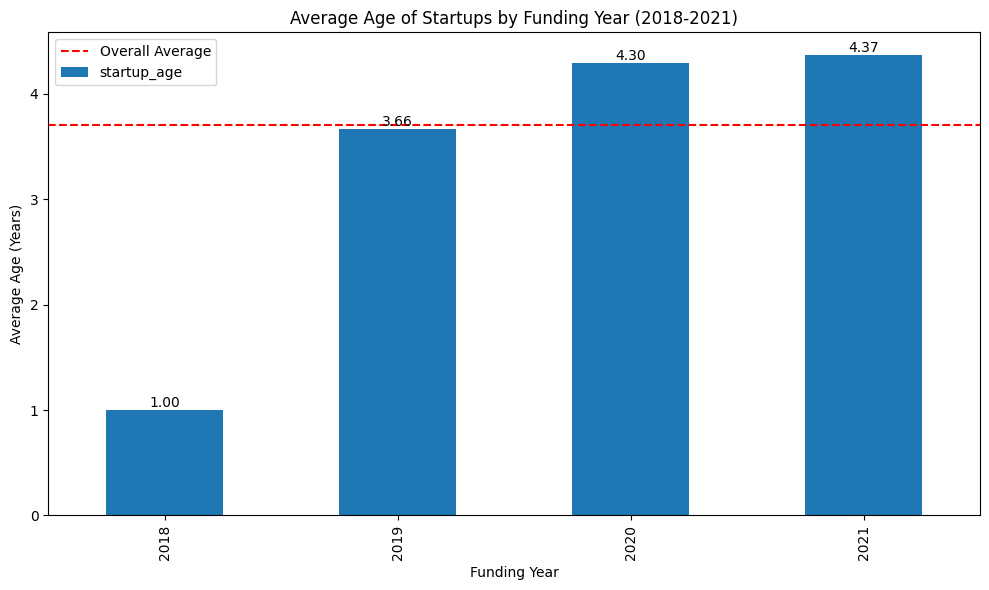

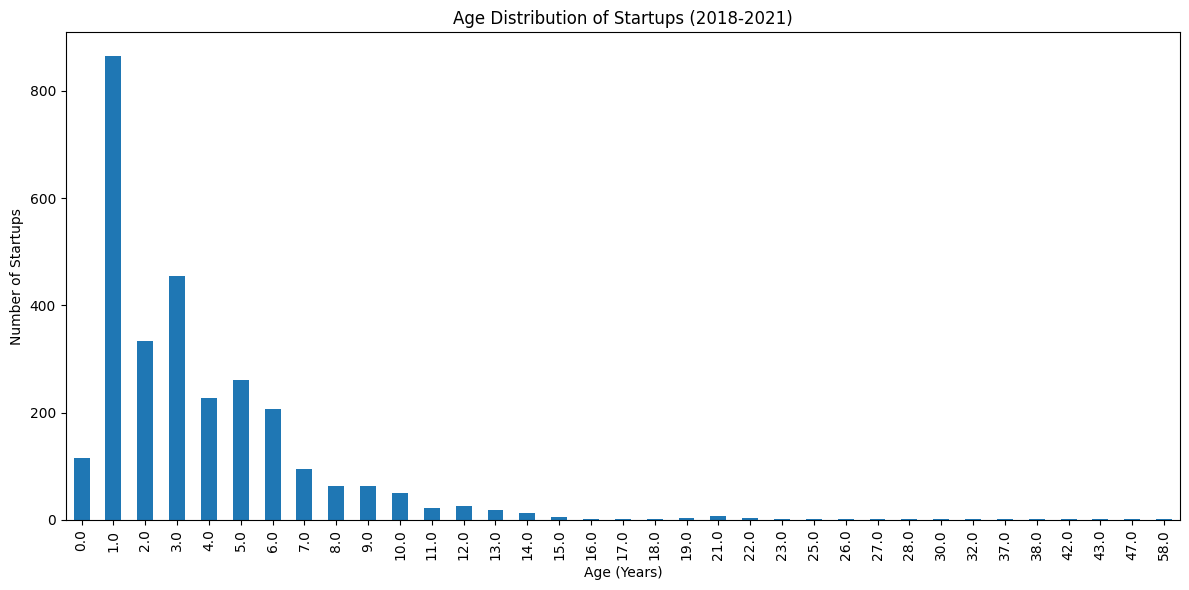

Age distribution statistics:
count    2856.000000
mean        3.699930
std         3.934394
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        58.000000
Name: startup_age, dtype: float64


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the years 2018-2021
df_filtered = df[(df['funding_year'] >= 2018) & (df['funding_year'] <= 2021)]

# Calculate the age of each startup
df_filtered['startup_age'] = df_filtered['funding_year'] - df_filtered['year_found']

# Calculate the average age of startups for each funding year
average_age_by_year = df_filtered.groupby('funding_year')['startup_age'].mean()

# Calculate the overall average age
overall_average_age = df_filtered['startup_age'].mean()

# Print the results
print("Average age of startups by funding year:")
print(average_age_by_year)
print(f"\
Overall average age of startups (2018-2021): {overall_average_age:.2f} years")

# Visualize the average age by funding year
plt.figure(figsize=(10, 6))
average_age_by_year.plot(kind='bar')
plt.title('Average Age of Startups by Funding Year (2018-2021)')
plt.xlabel('Funding Year')
plt.ylabel('Average Age (Years)')
plt.axhline(y=overall_average_age, color='r', linestyle='--', label='Overall Average')
plt.legend()
for i, v in enumerate(average_age_by_year):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Calculate age distribution
age_distribution = df_filtered['startup_age'].value_counts().sort_index()

# Visualize the age distribution
plt.figure(figsize=(12, 6))
age_distribution.plot(kind='bar')
plt.title('Age Distribution of Startups (2018-2021)')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Startups')
plt.tight_layout()
plt.show()

# Print age distribution statistics
print("\
Age distribution statistics:")
print(df_filtered['startup_age'].describe())

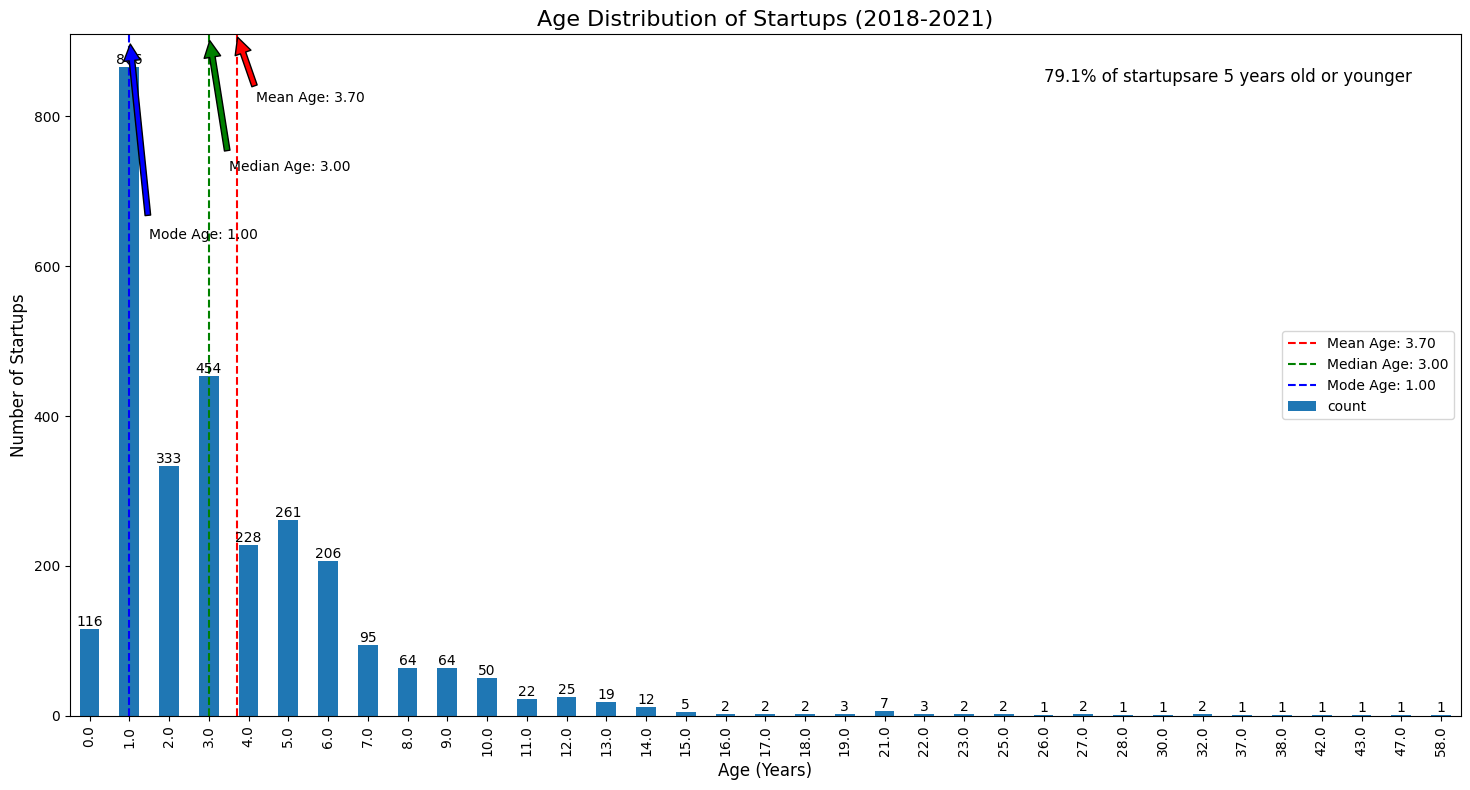

Percentage of startups 5 years old or younger: 79.1%
Number of startups older than 10 years: 119
Oldest startup age: 58.0 years
Youngest startup age: 0.0 years


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe for the years 2018-2021
df_filtered = df[(df['funding_year'] >= 2018) & (df['funding_year'] <= 2021)]

# Calculate the age of each startup
df_filtered['startup_age'] = df_filtered['funding_year'] - df_filtered['year_found']

# Calculate age distribution
age_distribution = df_filtered['startup_age'].value_counts().sort_index()

# Visualize the age distribution with annotations
plt.figure(figsize=(15, 8))
bars = age_distribution.plot(kind='bar')
plt.title('Age Distribution of Startups (2018-2021)', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(age_distribution):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Calculate and add mean, median, and mode
mean_age = df_filtered['startup_age'].mean()
median_age = df_filtered['startup_age'].median()
mode_age = df_filtered['startup_age'].mode().values[0]

plt.axvline(x=mean_age, color='r', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(x=median_age, color='g', linestyle='--', label=f'Median Age: {median_age:.2f}')
plt.axvline(x=mode_age, color='b', linestyle='--', label=f'Mode Age: {mode_age:.2f}')

# Add annotations for key statistics
plt.annotate(f'Mean Age: {mean_age:.2f}', xy=(mean_age, plt.ylim()[1]), xytext=(mean_age+0.5, plt.ylim()[1]*0.9),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median Age: {median_age:.2f}', xy=(median_age, plt.ylim()[1]), xytext=(median_age+0.5, plt.ylim()[1]*0.8),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode Age: {mode_age:.2f}', xy=(mode_age, plt.ylim()[1]), xytext=(mode_age+0.5, plt.ylim()[1]*0.7),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Add percentage of startups 5 years old or younger
pct_5years_or_younger = (df_filtered['startup_age'] <= 5).mean() * 100
plt.text(0.7, 0.95, f'{pct_5years_or_younger:.1f}% of startups\
are 5 years old or younger', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.legend()
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Percentage of startups 5 years old or younger: {pct_5years_or_younger:.1f}%")
print(f"Number of startups older than 10 years: {(df_filtered['startup_age'] > 10).sum()}")
print(f"Oldest startup age: {df_filtered['startup_age'].max()} years")
print(f"Youngest startup age: {df_filtered['startup_age'].min()} years")

In [89]:
# QUESTION 4
# Step 1: Filter the dataset for startups active between 2018 and 2021
df_filtered = df[(df['funding_year'] >= 2018) & (df['funding_year'] <= 2021)]

print("Number of startups active between 2018 and 2021:", len(df_filtered))
print("\
First few rows of the filtered dataset:")
print(df_filtered[['startup', 'funding_year', 'amount_usd']].head())

print("\
Done filtering the dataset.")

Number of startups active between 2018 and 2021: 2856
First few rows of the filtered dataset:
           startup  funding_year  amount_usd
0  TheCollegeFever          2018    250000.0
1  Happy Cow Dairy          2018    584000.0
2       MyLoanCare          2018    949000.0
3      PayMe India          2018   2000000.0
4         Eunimart          2018   3000000.0
Done filtering the dataset.


Average amount raised: $98,453,037.81
Summary statistics of amount raised:
count    2.856000e+03
mean     9.845304e+07
std      3.097962e+09
min      8.760000e+02
25%      1.000000e+06
50%      3.000000e+06
75%      8.000000e+06
max      1.500000e+11
Name: amount_usd, dtype: float64
Average amount raised per year:
funding_year
2018    1.349623e+07
2019    3.789251e+07
2020    8.631732e+07
2021    1.511917e+08
Name: amount_usd, dtype: float64


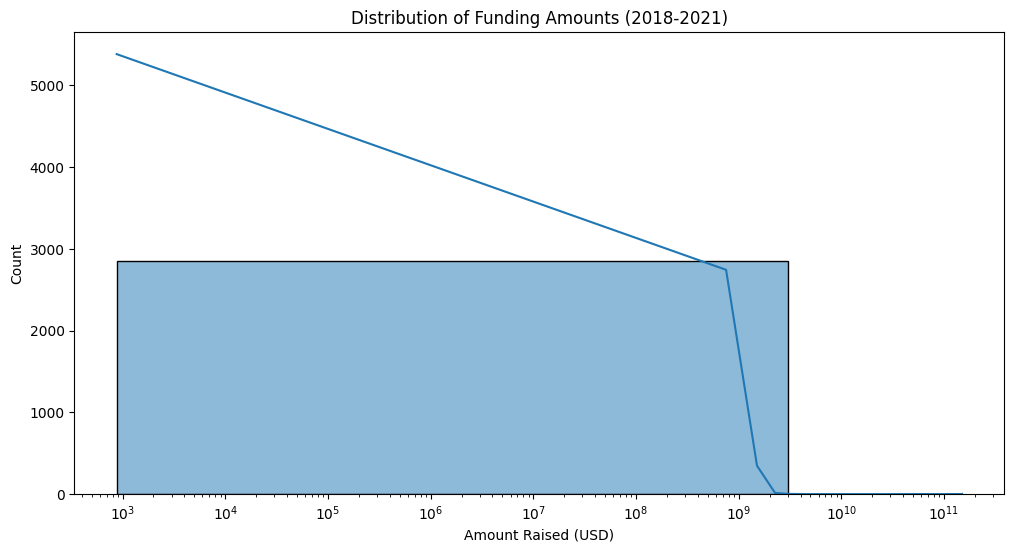

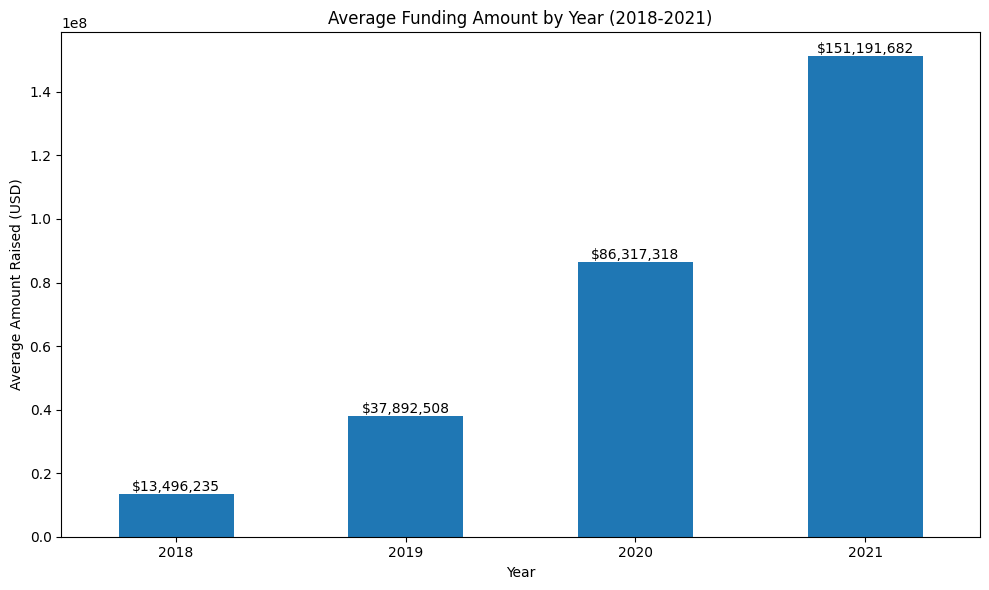

Analysis complete.


In [90]:
# Calculate the average amount of money raised
average_amount = df_filtered['amount_usd'].mean()

print(f"Average amount raised: ${average_amount:,.2f}")

# Calculate summary statistics
summary_stats = df_filtered['amount_usd'].describe()
print("\
Summary statistics of amount raised:")
print(summary_stats)

# Calculate average amount raised per year
average_by_year = df_filtered.groupby('funding_year')['amount_usd'].mean()
print("\
Average amount raised per year:")
print(average_by_year)

# Visualize the distribution of funding amounts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['amount_usd'], bins=50, kde=True)
plt.title('Distribution of Funding Amounts (2018-2021)')
plt.xlabel('Amount Raised (USD)')
plt.ylabel('Count')
plt.xscale('log')  # Using log scale for better visualization
plt.show()

# Visualize average funding amount by year
plt.figure(figsize=(10, 6))
average_by_year.plot(kind='bar')
plt.title('Average Funding Amount by Year (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Average Amount Raised (USD)')
plt.xticks(rotation=0)
for i, v in enumerate(average_by_year):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("Analysis complete.")

In [91]:
#Question 5
# Load the dataset and check the relevant columns for funding stages
df = pd.read_csv('allstartups_copy.csv')

# Display the first few rows to identify the column related to funding stages
print(df.head())

# Check for unique values in the funding stage column to understand the different stages
print("\
Unique funding stages:")
print(df['funding_stage'].unique())

print("\
Done loading the dataset and checking funding stages.")

           startup               industry   funding_stage  amount_usd  \
0  TheCollegeFever  Media & Entertainment  Early Traction    250000.0   
1  Happy Cow Dairy            Agriculture  Early Traction    584000.0   
2       MyLoanCare     Financial Services         Scaling    949000.0   
3      PayMe India     Financial Services      Validation   2000000.0   
4         Eunimart          Online Retail  Early Traction   3000000.0   

                                         description  year_found  \
0  TheCollegeFever is a hub for fun, fiesta and f...      2017.0   
1  A startup which aggregates milk from dairy far...      2017.0   
2          Leading Online Loans Marketplace in India      2017.0   
3  PayMe India is an innovative FinTech organizat...      2017.0   
4  Eunimart is a one stop solution for merchants ...      2017.0   

       founders     investors  funding_year       city          state country  
0  Not recorded  Not recorded          2018  Bengaluru      Karnataka   

Frequency of each funding stage:
funding_stage
Scaling           959
Not classified    942
Early Traction    767
Validation        114
Exit Options       74
Name: count, dtype: int64


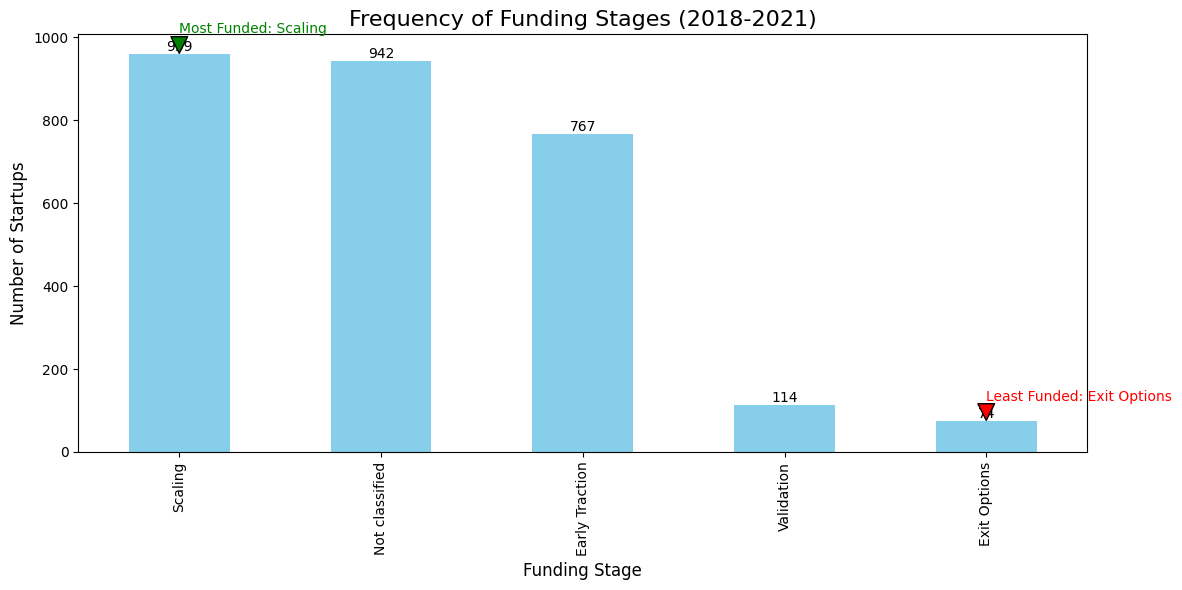

Analysis complete.


In [92]:
# Analyze the frequency of funding at each stage
funding_stage_counts = df['funding_stage'].value_counts()

# Print the frequency of each funding stage
print("Frequency of each funding stage:")
print(funding_stage_counts)

# Visualize the funding stages with annotations
plt.figure(figsize=(12, 6))
bars = funding_stage_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Funding Stages (2018-2021)', fontsize=16)
plt.xlabel('Funding Stage', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(funding_stage_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Highlight the most and least frequently funded stages
most_funded_stage = funding_stage_counts.idxmax()
least_funded_stage = funding_stage_counts.idxmin()

plt.annotate(f'Most Funded: {most_funded_stage}', xy=(funding_stage_counts.index.get_loc(most_funded_stage), funding_stage_counts.max()),
             xytext=(funding_stage_counts.index.get_loc(most_funded_stage), funding_stage_counts.max() + 50),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

plt.annotate(f'Least Funded: {least_funded_stage}', xy=(funding_stage_counts.index.get_loc(least_funded_stage), funding_stage_counts.min()),
             xytext=(funding_stage_counts.index.get_loc(least_funded_stage), funding_stage_counts.min() + 50),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Analysis complete.")

HYPOTHESIS

In [93]:
#Hypothesis Testing 1 
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('allstartups_copy.csv')

# Check relevant columns
print("Columns in the dataset:")
print(df.columns)

# Display the first few rows of relevant columns
print("\
First few rows of relevant columns:")
print(df[['startup', 'year_found', 'funding_year', 'amount_usd']].head())

# Check for missing values
print("\
Missing values in relevant columns:")
print(df[['year_found', 'funding_year', 'amount_usd']].isnull().sum())

print("\
Dataset loaded and checked.")

Columns in the dataset:
Index(['startup', 'industry', 'funding_stage', 'amount_usd', 'description',
       'year_found', 'founders', 'investors', 'funding_year', 'city', 'state',
       'country'],
      dtype='object')
First few rows of relevant columns:
           startup  year_found  funding_year  amount_usd
0  TheCollegeFever      2017.0          2018    250000.0
1  Happy Cow Dairy      2017.0          2018    584000.0
2       MyLoanCare      2017.0          2018    949000.0
3      PayMe India      2017.0          2018   2000000.0
4         Eunimart      2017.0          2018   3000000.0
Missing values in relevant columns:
year_found      0
funding_year    0
amount_usd      0
dtype: int64
Dataset loaded and checked.


Summary statistics:
                    count          mean     median           std
age_group                                                       
3 years or younger   1769  9.551359e+07  3000000.0  3.566415e+09
older than 3 years   1087  1.032367e+08  5000000.0  2.126891e+09
Mann-Whitney U test results:
Statistic: 648307.5
p-value: 4.6414274614570494e-49


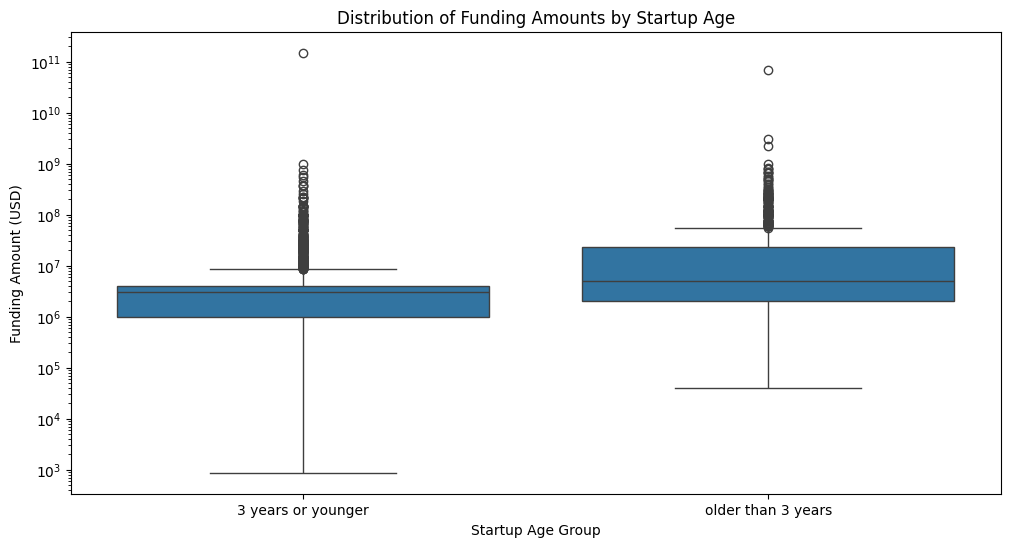

Analysis complete.


In [94]:
import pandas as pd
import numpy as np
from scipy import stats

# Calculate the age of startups at the time of funding
df['startup_age'] = df['funding_year'] - df['year_found']

# Segment startups into two groups: 3 years or younger, and older than 3 years
df['age_group'] = np.where(df['startup_age'] <= 3, '3 years or younger', 'older than 3 years')

# Calculate summary statistics for each group
summary_stats = df.groupby('age_group')['amount_usd'].agg(['count', 'mean', 'median', 'std'])
print("Summary statistics:")
print(summary_stats)

# Perform Mann-Whitney U test
young_startups = df[df['age_group'] == '3 years or younger']['amount_usd']
old_startups = df[df['age_group'] == 'older than 3 years']['amount_usd']

statistic, p_value = stats.mannwhitneyu(young_startups, old_startups, alternative='two-sided')

print("\
Mann-Whitney U test results:")
print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")

# Visualize the distribution of funding amounts for each group
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='amount_usd', data=df)
plt.title('Distribution of Funding Amounts by Startup Age')
plt.xlabel('Startup Age Group')
plt.ylabel('Funding Amount (USD)')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

print("Analysis complete.")

In [95]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('allstartups_copy.csv')

# Calculate the age of startups at the time of funding
df['startup_age'] = df['funding_year'] - df['year_found']

# Segment startups into two groups: 3 years or younger, and older than 3 years
df['age_group'] = np.where(df['startup_age'] <= 3, '3 years or younger', 'older than 3 years')

# Display the first few rows to verify the new columns
print(df[['startup', 'startup_age', 'age_group', 'amount_usd']].head(10))

print("\
Dataset prepared for z-test.")

              startup  startup_age           age_group  amount_usd
0     TheCollegeFever          1.0  3 years or younger    250000.0
1     Happy Cow Dairy          1.0  3 years or younger    584000.0
2          MyLoanCare          1.0  3 years or younger    949000.0
3         PayMe India          1.0  3 years or younger   2000000.0
4            Eunimart          1.0  3 years or younger   3000000.0
5              Hasura          1.0  3 years or younger   1600000.0
6           Tripshelf          1.0  3 years or younger    233600.0
7        Hyperdata.IO          1.0  3 years or younger    730000.0
8        Freightwalla          1.0  3 years or younger   3000000.0
9  Microchip Payments          1.0  3 years or younger   3000000.0
Dataset prepared for z-test.


In [96]:
# Calculate the mean and standard deviation for each group
young_startups = df[df['age_group'] == '3 years or younger']['amount_usd']
old_startups = df[df['age_group'] == 'older than 3 years']['amount_usd']

mean_young = young_startups.mean()
std_young = young_startups.std()
n_young = len(young_startups)

mean_old = old_startups.mean()
std_old = old_startups.std()
n_old = len(old_startups)

# Calculate the z-score
z_score = (mean_young - mean_old) / np.sqrt((std_young**2 / n_young) + (std_old**2 / n_old))

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

print("Z-test results:")
print(f"Mean funding (3 years or younger): ${mean_young:,.2f}")
print(f"Mean funding (older than 3 years): ${mean_old:,.2f}")
print(f"Z-score: {z_score}")
print(f"p-value: {p_value}")

print("Analysis complete.")

Z-test results:
Mean funding (3 years or younger): $95,513,587.19
Mean funding (older than 3 years): $103,236,743.56
Z-score: -0.07248763813675557
p-value: 0.9422138429267859
Analysis complete.


In [97]:
# chi squared
import pandas as pd

# Load the dataset
df = pd.read_csv('allstartups_copy.csv')

# Calculate the age of startups at the time of funding
df['startup_age'] = df['funding_year'] - df['year_found']

# Create age groups
df['age_group'] = np.where(df['startup_age'] <= 3, '3 years or younger', 'older than 3 years')

# Create funding categories based on amount
bins = [0, 1000000, 5000000, 10000000, np.inf]
labels = ['<1M', '1M-5M', '5M-10M', '>10M']
df['funding_category'] = pd.cut(df['amount_usd'], bins=bins, labels=labels)

# Display the first few rows to verify the new columns
print(df[['startup', 'age_group', 'funding_category']].head(10))

print("\
Dataset prepared for chi-squared test.")

              startup           age_group funding_category
0     TheCollegeFever  3 years or younger              <1M
1     Happy Cow Dairy  3 years or younger              <1M
2          MyLoanCare  3 years or younger              <1M
3         PayMe India  3 years or younger            1M-5M
4            Eunimart  3 years or younger            1M-5M
5              Hasura  3 years or younger            1M-5M
6           Tripshelf  3 years or younger              <1M
7        Hyperdata.IO  3 years or younger              <1M
8        Freightwalla  3 years or younger            1M-5M
9  Microchip Payments  3 years or younger            1M-5M
Dataset prepared for chi-squared test.


In [98]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['age_group'], df['funding_category'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)

print("\
Chi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

print("\
Expected frequencies:")
print(expected)

print("Analysis complete.")

Contingency Table:
funding_category    <1M  1M-5M  5M-10M  >10M
age_group                                   
3 years or younger  546    860     128   235
older than 3 years  188    385     142   372
Chi-squared test results:
Chi-squared statistic: 238.2069024452913
p-value: 2.32411400897945e-51
Degrees of freedom: 3
Expected frequencies:
[[454.63795518 771.15021008 167.23739496 375.97443978]
 [279.36204482 473.84978992 102.76260504 231.02556022]]
Analysis complete.


In [99]:
# Hypothesis 2
import pandas as pd

# Load the dataset
df = pd.read_csv('allstartups_copy.csv')

# Display the first few rows to verify the dataset
print(df.head())

print("\
Dataset loaded.")

           startup               industry   funding_stage  amount_usd  \
0  TheCollegeFever  Media & Entertainment  Early Traction    250000.0   
1  Happy Cow Dairy            Agriculture  Early Traction    584000.0   
2       MyLoanCare     Financial Services         Scaling    949000.0   
3      PayMe India     Financial Services      Validation   2000000.0   
4         Eunimart          Online Retail  Early Traction   3000000.0   

                                         description  year_found  \
0  TheCollegeFever is a hub for fun, fiesta and f...      2017.0   
1  A startup which aggregates milk from dairy far...      2017.0   
2          Leading Online Loans Marketplace in India      2017.0   
3  PayMe India is an innovative FinTech organizat...      2017.0   
4  Eunimart is a one stop solution for merchants ...      2017.0   

       founders     investors  funding_year       city          state country  
0  Not recorded  Not recorded          2018  Bengaluru      Karnataka   

In [100]:
# Define beginning and end stages
beginning_stages = ['Seed', 'Validation', 'Early Traction']
end_stages = ['Scaling', 'Exit Options']

# Segment startups into beginning and end stages
df['stage_group'] = df['funding_stage'].apply(lambda x: 'beginning' if x in beginning_stages else ('end' if x in end_stages else 'other'))

# Filter out 'other' stages
filtered_df = df[df['stage_group'] != 'other']

# Display the first few rows to verify the new column
print(filtered_df[['startup', 'funding_stage', 'stage_group', 'amount_usd']].head(10))

print("\
Data segmented into beginning and end stages.")

              startup   funding_stage stage_group  amount_usd
0     TheCollegeFever  Early Traction   beginning    250000.0
1     Happy Cow Dairy  Early Traction   beginning    584000.0
2          MyLoanCare         Scaling         end    949000.0
3         PayMe India      Validation   beginning   2000000.0
4            Eunimart  Early Traction   beginning   3000000.0
5              Hasura  Early Traction   beginning   1600000.0
6           Tripshelf  Early Traction   beginning    233600.0
7        Hyperdata.IO      Validation   beginning    730000.0
8        Freightwalla  Early Traction   beginning   3000000.0
9  Microchip Payments  Early Traction   beginning   3000000.0
Data segmented into beginning and end stages.


In [101]:
# Calculate the mean and standard deviation for each group
beginning_funding = filtered_df[filtered_df['stage_group'] == 'beginning']['amount_usd']
end_funding = filtered_df[filtered_df['stage_group'] == 'end']['amount_usd']

mean_beginning = beginning_funding.mean()
std_beginning = beginning_funding.std()
n_beginning = len(beginning_funding)

mean_end = end_funding.mean()
std_end = end_funding.std()
n_end = len(end_funding)

# Calculate the z-score
z_score = (mean_beginning - mean_end) / np.sqrt((std_beginning**2 / n_beginning) + (std_end**2 / n_end))

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

print("Z-test results:")
print(f"Mean funding (beginning stages): ${mean_beginning:,.2f}")
print(f"Mean funding (end stages): ${mean_end:,.2f}")
print(f"Z-score: {z_score}")
print(f"p-value: {p_value}")

print("Analysis complete.")

Z-test results:
Mean funding (beginning stages): $2,259,706.61
Mean funding (end stages): $173,181,743.86
Z-score: -1.1771607400081245
p-value: 0.2391313553764296
Analysis complete.
